##You Go Glen Coco! (A Word About Data)

In [1]:
import networkx as nx
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
from IPython.display import YouTubeVideo
from collections import Counter
import csv

In [2]:
node_list = []

with open('../data/nodes.csv', 'r') as openfile:
    reader = csv.reader(openfile)
    next(reader, None)
    for row in reader:
        node_list.append((row[0], {'name' : row[1]}))
        
edge_list = []

with open('../data/edges.csv', 'r') as openfile:
    reader = csv.reader(openfile)
    next(reader, None)
    for row in reader:
        if row[1] == '':
            pass
        else:
            edge_list.append((row[0], row[1]))
        
edge_counter = Counter(edge_list)

edgelist_with_weight = []
for key, value in edge_counter.items():
    edgelist_with_weight.append((key[0], key[1], value))

mean_girls_weighted = nx.Graph()
mean_girls_weighted.add_nodes_from(node_list)
mean_girls_weighted.add_weighted_edges_from(edgelist_with_weight)

edgewidth=[]
for (u, v, d) in mean_girls_weighted.edges(data=True):
    edgewidth.append(d['weight'])
    
for x in range(0, len(edgewidth)):
    edgewidth[x] = (edgewidth[x]/float(max(edgewidth) / 30))
    
cady = ['Cady Heron']
friends = ['Damian', 'Janis Ian']
plastics = ['Karen Smith', 'Regina George', 'Gretchen Weiners']
love_interests = ['Aaron Samuels', 'Kevin Gnapoor', 'Shane Oman']
teachers = ['Ms. Norbury', 'Mr. Duvall', 'Chemistry Teacher', 
            'English Teacher', 'History Teacher', 'Music Teacher',
            'German Teacher', 'Coach Carr']
family = ['Cady\'s Dad', 'Cady\'s Mom', 'Taylor Wedell\'s Mom', 
          'Mrs. George', 'Mr. George', 'Kylie George']

cady_dict = {}
friends_dict = {}
plastics_dict = {}
family_dict = {}
love_interests_dict = {}
teachers_dict = {}
family_dict = {}
all_other_nodes = {}

for node in mean_girls_weighted.nodes_iter(data=True):
    if node[1]['name'] in cady:
        cady_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in friends:
        friends_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in plastics:
        plastics_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in love_interests:
        love_interests_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in teachers:
        teachers_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in family:
        family_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in cady:
        pass
    elif node[1]['name'] in friends:
        pass
    elif node[1]['name'] in plastics:
        pass
    else:
        all_other_nodes[node[1]['name']] = node[0]
        
character_dicts = {
    'cady' : {
        'dict' : cady_dict,
        'size' : 7500,
        'color' : 'blue',
        'label' : True
    },
    'friends' : {
        'dict' : friends_dict,
        'size' : 5000,
        'color' : 'green',
        'label' : True
    },
    'plastics' : {
        'dict' : plastics_dict,
        'size' : 5000,
        'color' : 'hotpink',
        'label' : True
    },
    'love_interests' : {
        'dict' : love_interests_dict,
        'size' : 4000,
        'color' : 'red',
        'label' : True
    },
    'teachers_dict' : {
        'dict' : teachers_dict,
        'size' : 4000,
        'color' : 'aqua',
        'label' : True
    },
    'family_dict' : {
        'dict' : family_dict,
        'size' : 3500,
        'color' : 'purple',
        'label' : True
    },
    'all_others' : {
        'dict' : all_other_nodes,
        'size' : 500,
        'color' : 'lightgray',
        'label' : False
    }
}

##You've Probably Been Victimized by Regina George

In [3]:
YouTubeVideo('KDnsGF-GR2Q')

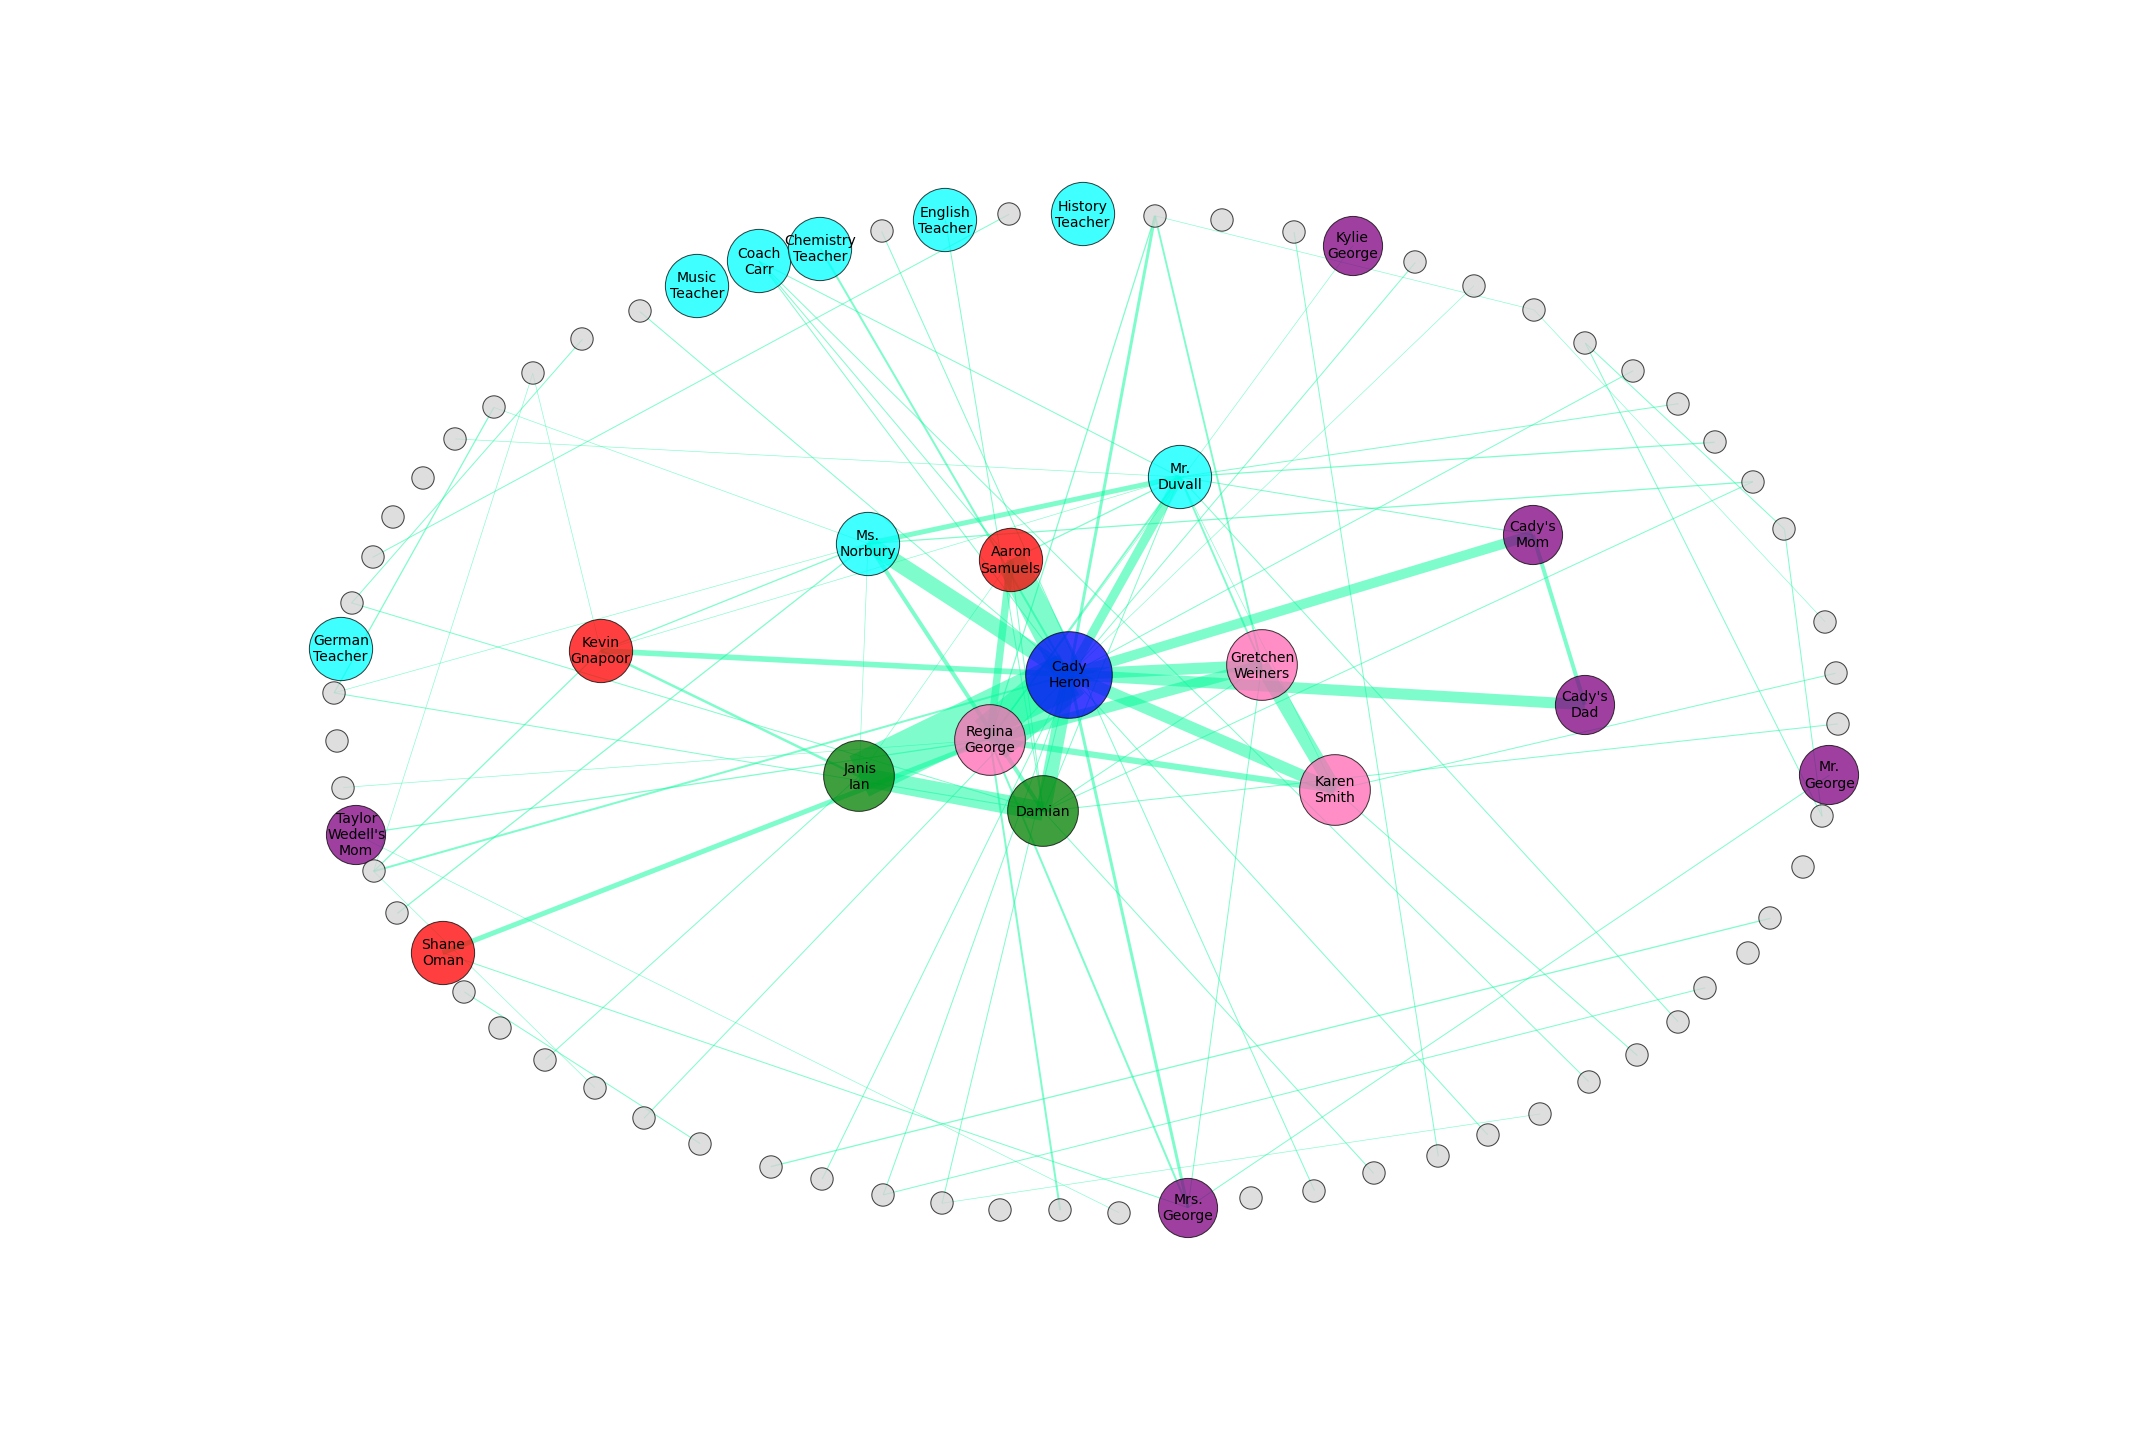

In [4]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

How many people can Regina George reach?

In [5]:
len(nx.node_connected_component(mean_girls_weighted, '31'))

56

In [6]:
percent_regina = len(nx.node_connected_component(mean_girls_weighted, '31')) / float(nx.number_of_nodes(mean_girls_weighted))

print 'Percent Reachable by Regina George: {0:.2f}%'.format(100 * percent_regina)

Percent Reachable by Regina George: 68.29%


In [7]:
nx.single_source_shortest_path(mean_girls_weighted, '31', cutoff=1)

{'10': ['31', '10'],
 '18': ['31', '18'],
 '2': ['31', '2'],
 '31': ['31'],
 '32': ['31', '32'],
 '33': ['31', '33'],
 '34': ['31', '34'],
 '37': ['31', '37'],
 '39': ['31', '39'],
 '40': ['31', '40'],
 '46': ['31', '46'],
 '52': ['31', '52'],
 '55': ['31', '55']}

In [8]:
nx.single_source_shortest_path(mean_girls_weighted, '31', cutoff=2)

{'0': ['31', '2', '0'],
 '1': ['31', '10', '1'],
 '10': ['31', '10'],
 '12': ['31', '2', '12'],
 '17': ['31', '18', '17'],
 '18': ['31', '18'],
 '2': ['31', '2'],
 '20': ['31', '2', '20'],
 '21': ['31', '10', '21'],
 '23': ['31', '10', '23'],
 '30': ['31', '10', '30'],
 '31': ['31'],
 '32': ['31', '32'],
 '33': ['31', '33'],
 '34': ['31', '34'],
 '35': ['31', '2', '35'],
 '36': ['31', '10', '36'],
 '37': ['31', '37'],
 '38': ['31', '37', '38'],
 '39': ['31', '39'],
 '40': ['31', '40'],
 '41': ['31', '40', '41'],
 '42': ['31', '2', '42'],
 '44': ['31', '33', '44'],
 '45': ['31', '2', '45'],
 '46': ['31', '46'],
 '47': ['31', '2', '47'],
 '52': ['31', '52'],
 '53': ['31', '10', '53'],
 '54': ['31', '33', '54'],
 '55': ['31', '55'],
 '56': ['31', '2', '56'],
 '58': ['31', '2', '58'],
 '59': ['31', '2', '59'],
 '6': ['31', '2', '6'],
 '7': ['31', '34', '7'],
 '76': ['31', '10', '76'],
 '77': ['31', '10', '77'],
 '78': ['31', '2', '78'],
 '9': ['31', '10', '9']}

In [9]:
nx.single_source_shortest_path(mean_girls_weighted, '31', cutoff=3)

{'0': ['31', '2', '0'],
 '1': ['31', '10', '1'],
 '10': ['31', '10'],
 '11': ['31', '10', '9', '11'],
 '12': ['31', '2', '12'],
 '13': ['31', '10', '21', '13'],
 '17': ['31', '18', '17'],
 '18': ['31', '18'],
 '19': ['31', '18', '17', '19'],
 '2': ['31', '2'],
 '20': ['31', '2', '20'],
 '21': ['31', '10', '21'],
 '22': ['31', '34', '7', '22'],
 '23': ['31', '10', '23'],
 '28': ['31', '10', '21', '28'],
 '30': ['31', '10', '30'],
 '31': ['31'],
 '32': ['31', '32'],
 '33': ['31', '33'],
 '34': ['31', '34'],
 '35': ['31', '2', '35'],
 '36': ['31', '10', '36'],
 '37': ['31', '37'],
 '38': ['31', '37', '38'],
 '39': ['31', '39'],
 '40': ['31', '40'],
 '41': ['31', '40', '41'],
 '42': ['31', '2', '42'],
 '44': ['31', '33', '44'],
 '45': ['31', '2', '45'],
 '46': ['31', '46'],
 '47': ['31', '2', '47'],
 '48': ['31', '10', '21', '48'],
 '49': ['31', '10', '21', '49'],
 '50': ['31', '10', '21', '50'],
 '52': ['31', '52'],
 '53': ['31', '10', '53'],
 '54': ['31', '33', '54'],
 '55': ['31', '55']

Let's see that mapped out 

In [10]:
victimized_1 = []
victimized_2 = []
victimized_3 = []

for key, value in nx.single_source_shortest_path(mean_girls_weighted, '31', cutoff=3).items():
    if len(value) == 2:
        victimized_1.append((value[0], value[1]))
    elif len(value) == 3:
        for x in range(0, 2):
            victimized_2.append((value[x], value[x+1]))
    elif len(value) == 4:
        for x in range(0, 3):
            victimized_3.append((value[x], value[x+1]))
    else:
        pass
    
victimized_3

[('31', '10'),
 ('10', '21'),
 ('21', '28'),
 ('31', '34'),
 ('34', '7'),
 ('7', '22'),
 ('31', '10'),
 ('10', '21'),
 ('21', '50'),
 ('31', '10'),
 ('10', '23'),
 ('23', '60'),
 ('31', '18'),
 ('18', '17'),
 ('17', '19'),
 ('31', '2'),
 ('2', '78'),
 ('78', '81'),
 ('31', '10'),
 ('10', '21'),
 ('21', '48'),
 ('31', '2'),
 ('2', '6'),
 ('6', '8'),
 ('31', '10'),
 ('10', '21'),
 ('21', '49'),
 ('31', '10'),
 ('10', '21'),
 ('21', '13'),
 ('31', '10'),
 ('10', '21'),
 ('21', '73'),
 ('31', '10'),
 ('10', '9'),
 ('9', '72'),
 ('31', '2'),
 ('2', '78'),
 ('78', '79'),
 ('31', '10'),
 ('10', '9'),
 ('9', '11'),
 ('31', '2'),
 ('2', '56'),
 ('56', '57')]

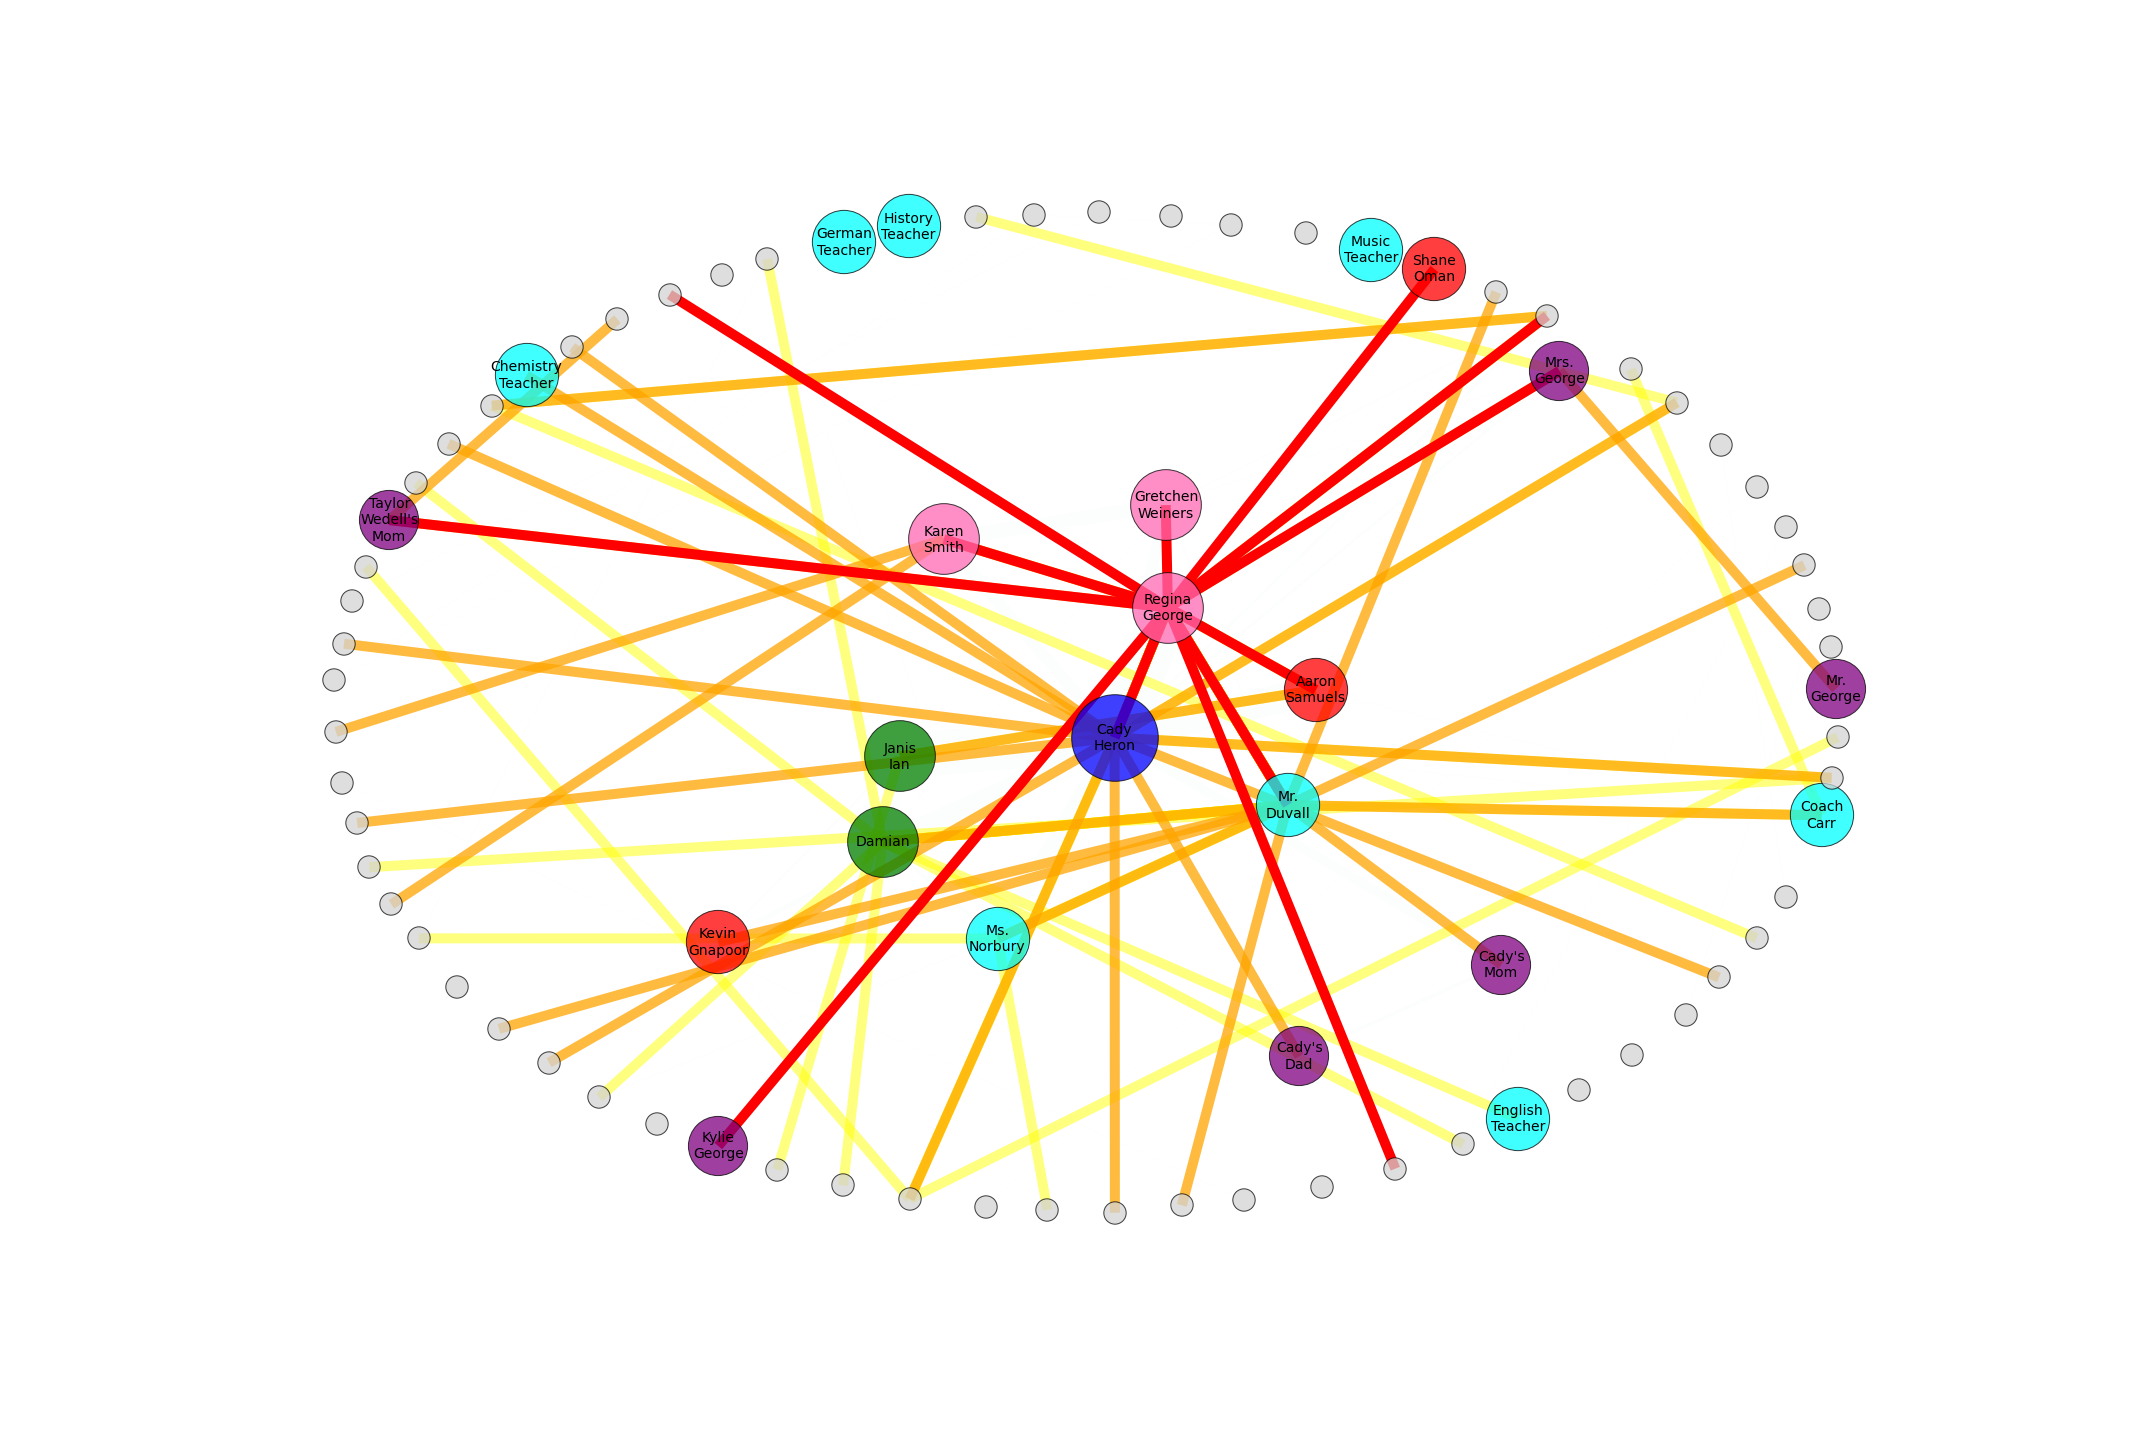

In [11]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.01)
nx.draw_networkx_edges(mean_girls_weighted, pos, width=10, edgelist=victimized_3,
                      edge_color='yellow', alpha=0.5)
nx.draw_networkx_edges(mean_girls_weighted, pos, width=10, edgelist=victimized_2,
                      edge_color='orange', alpha=0.75)
nx.draw_networkx_edges(mean_girls_weighted, pos, width=10, edgelist=victimized_1,
                      edge_color='red', alpha=1.0)
plt.axis('off')
plt.tight_layout()

##Why you can't sit with us

In [12]:
YouTubeVideo('W8_POt2KlfQ')

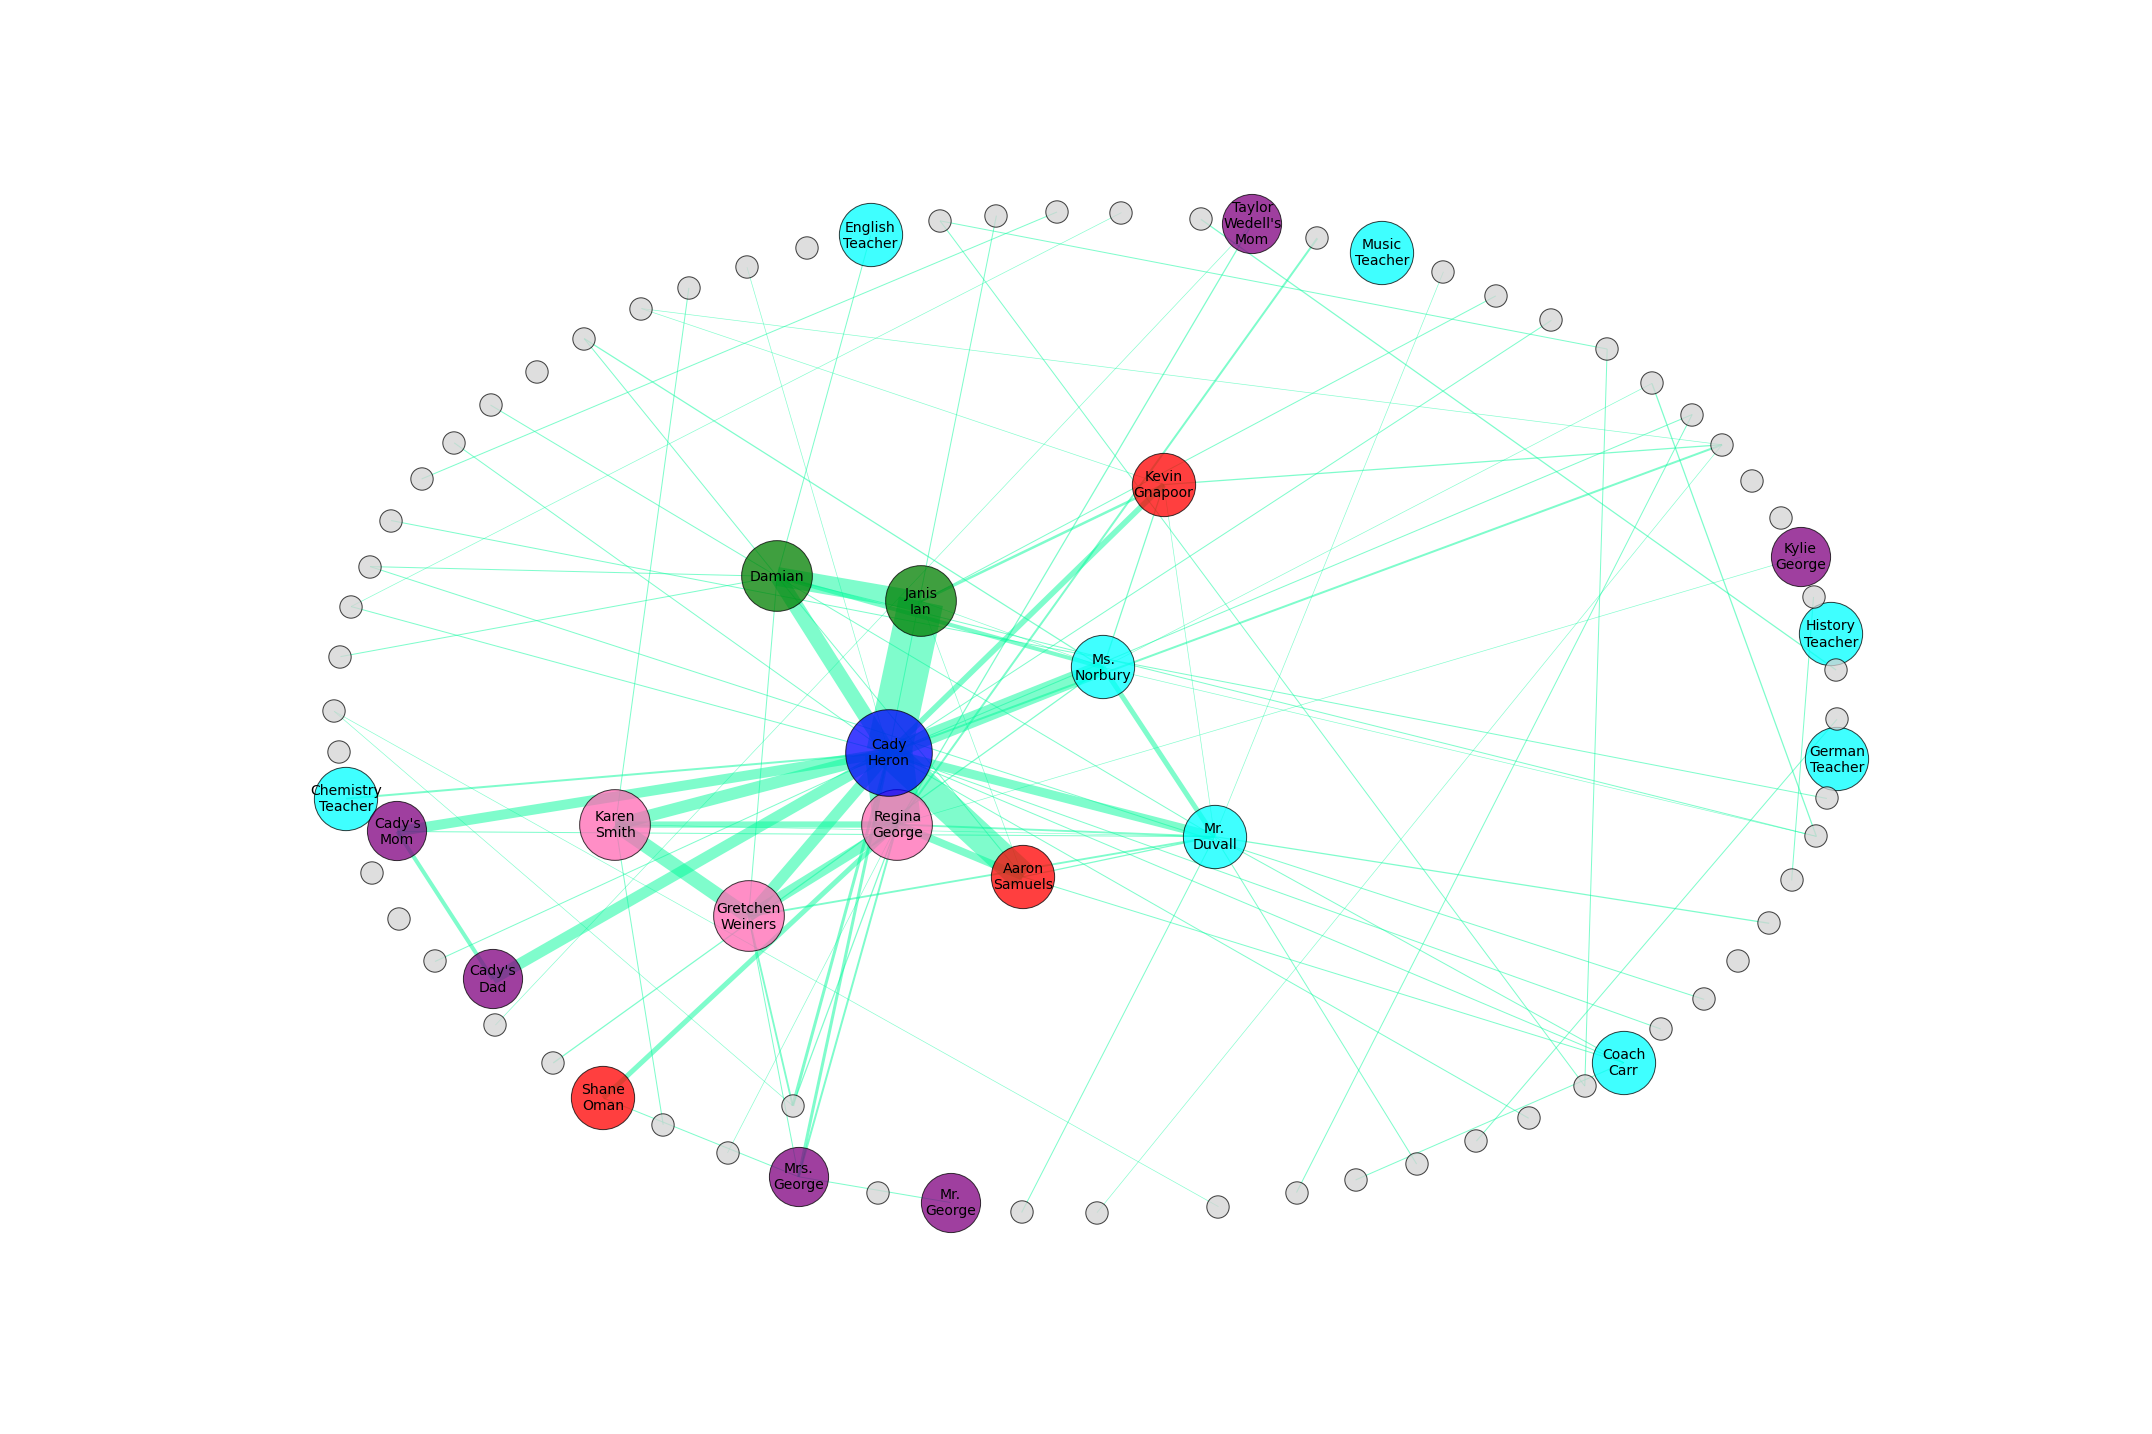

In [13]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [14]:
no_cady = nx.Graph(mean_girls_weighted)

no_cady.remove_edges_from([edge for edge in no_cady.edges_iter() 
                                       if edge[0] == '2' or edge[1] == '2'])
no_cady.remove_node('2')

no_cady_dicts = character_dicts.copy()

del no_cady_dicts['cady']

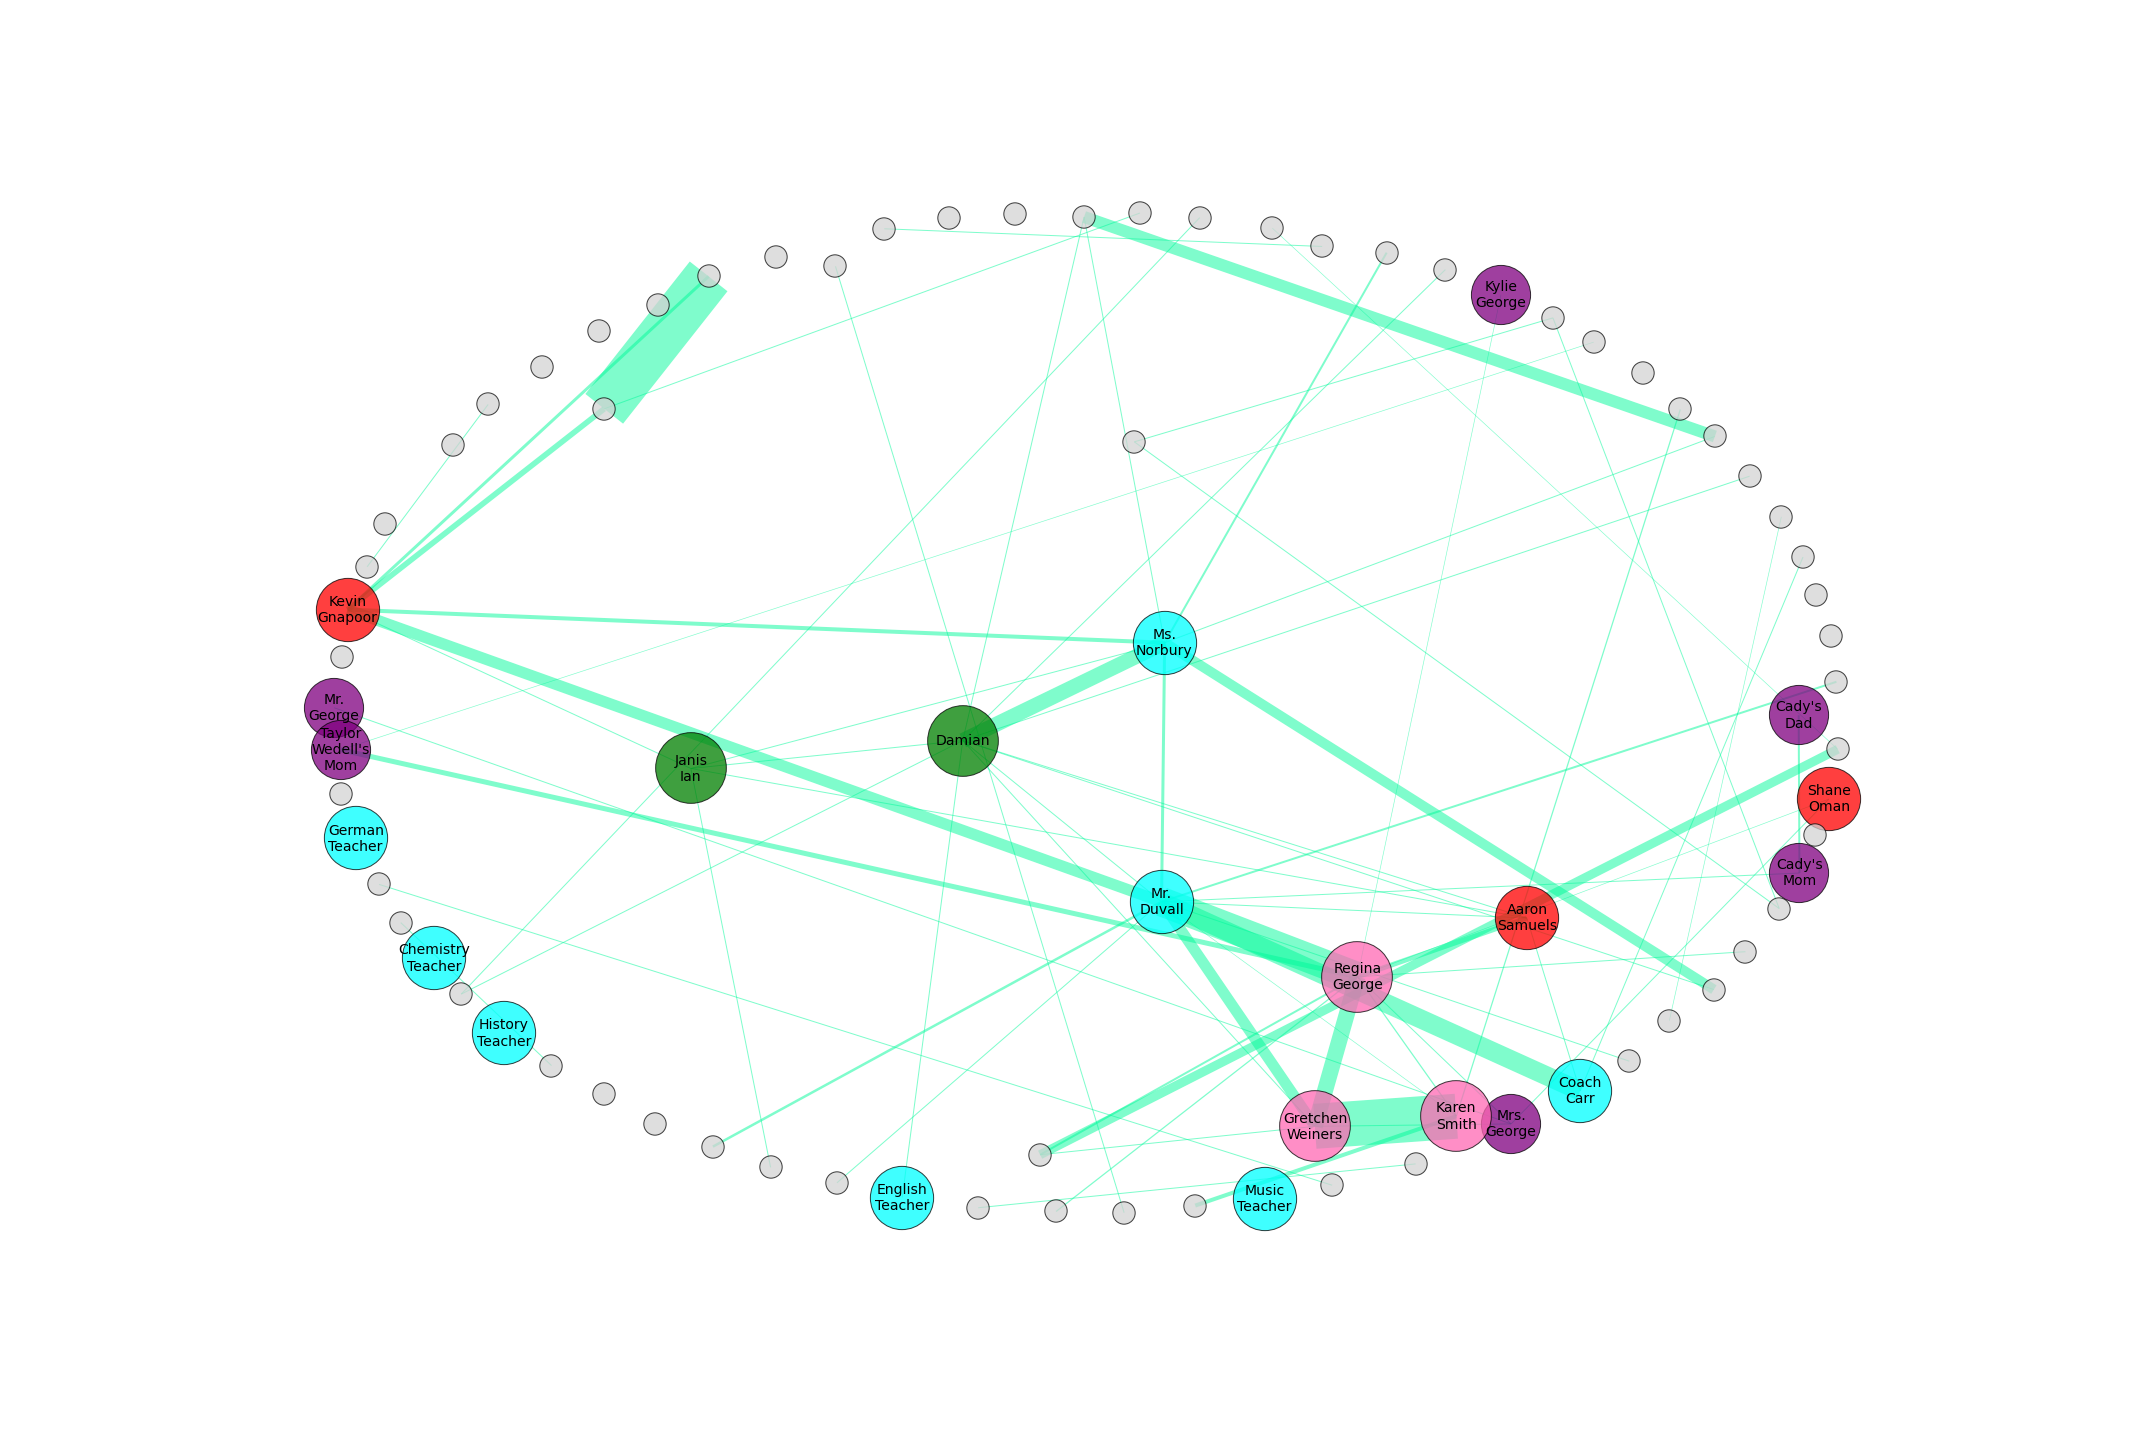

In [15]:
pos = nx.spring_layout(no_cady, k=0.35)
for key, attribute in no_cady_dicts.items():
    nx.draw_networkx_nodes(no_cady, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(no_cady, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(no_cady, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [16]:
print nx.info(no_cady)

Name: 
Type: Graph
Number of nodes: 81
Number of edges: 71
Average degree:   1.7531


In [17]:
nx.number_connected_components(no_cady)

30

In [18]:
no_cady_components = list(nx.connected_components(no_cady))
no_cady_components

[['58'],
 ['41',
  '50',
  '60',
  '19',
  '49',
  '52',
  '81',
  '21',
  '48',
  '23',
  '46',
  '44',
  '28',
  '29',
  '40',
  '18',
  '1',
  '0',
  '7',
  '9',
  '13',
  '77',
  '76',
  '73',
  '72',
  '79',
  '78',
  '11',
  '10',
  '39',
  '38',
  '22',
  '17',
  '33',
  '32',
  '31',
  '30',
  '37',
  '36',
  '53',
  '34',
  '55',
  '54'],
 ['61', '62', '71'],
 ['80', '63'],
 ['64', '65'],
 ['66', '67'],
 ['68', '69'],
 ['24'],
 ['25'],
 ['26'],
 ['27'],
 ['20'],
 ['45'],
 ['42'],
 ['43'],
 ['3'],
 ['5'],
 ['4'],
 ['8', '6'],
 ['35'],
 ['75', '74'],
 ['12'],
 ['70'],
 ['15'],
 ['59'],
 ['14'],
 ['16'],
 ['57', '56'],
 ['51'],
 ['47']]

In [19]:
import six
from matplotlib import colors

colors = [color[0] for color in six.iteritems(colors.cnames)]

What does the network look like in No Cady World?

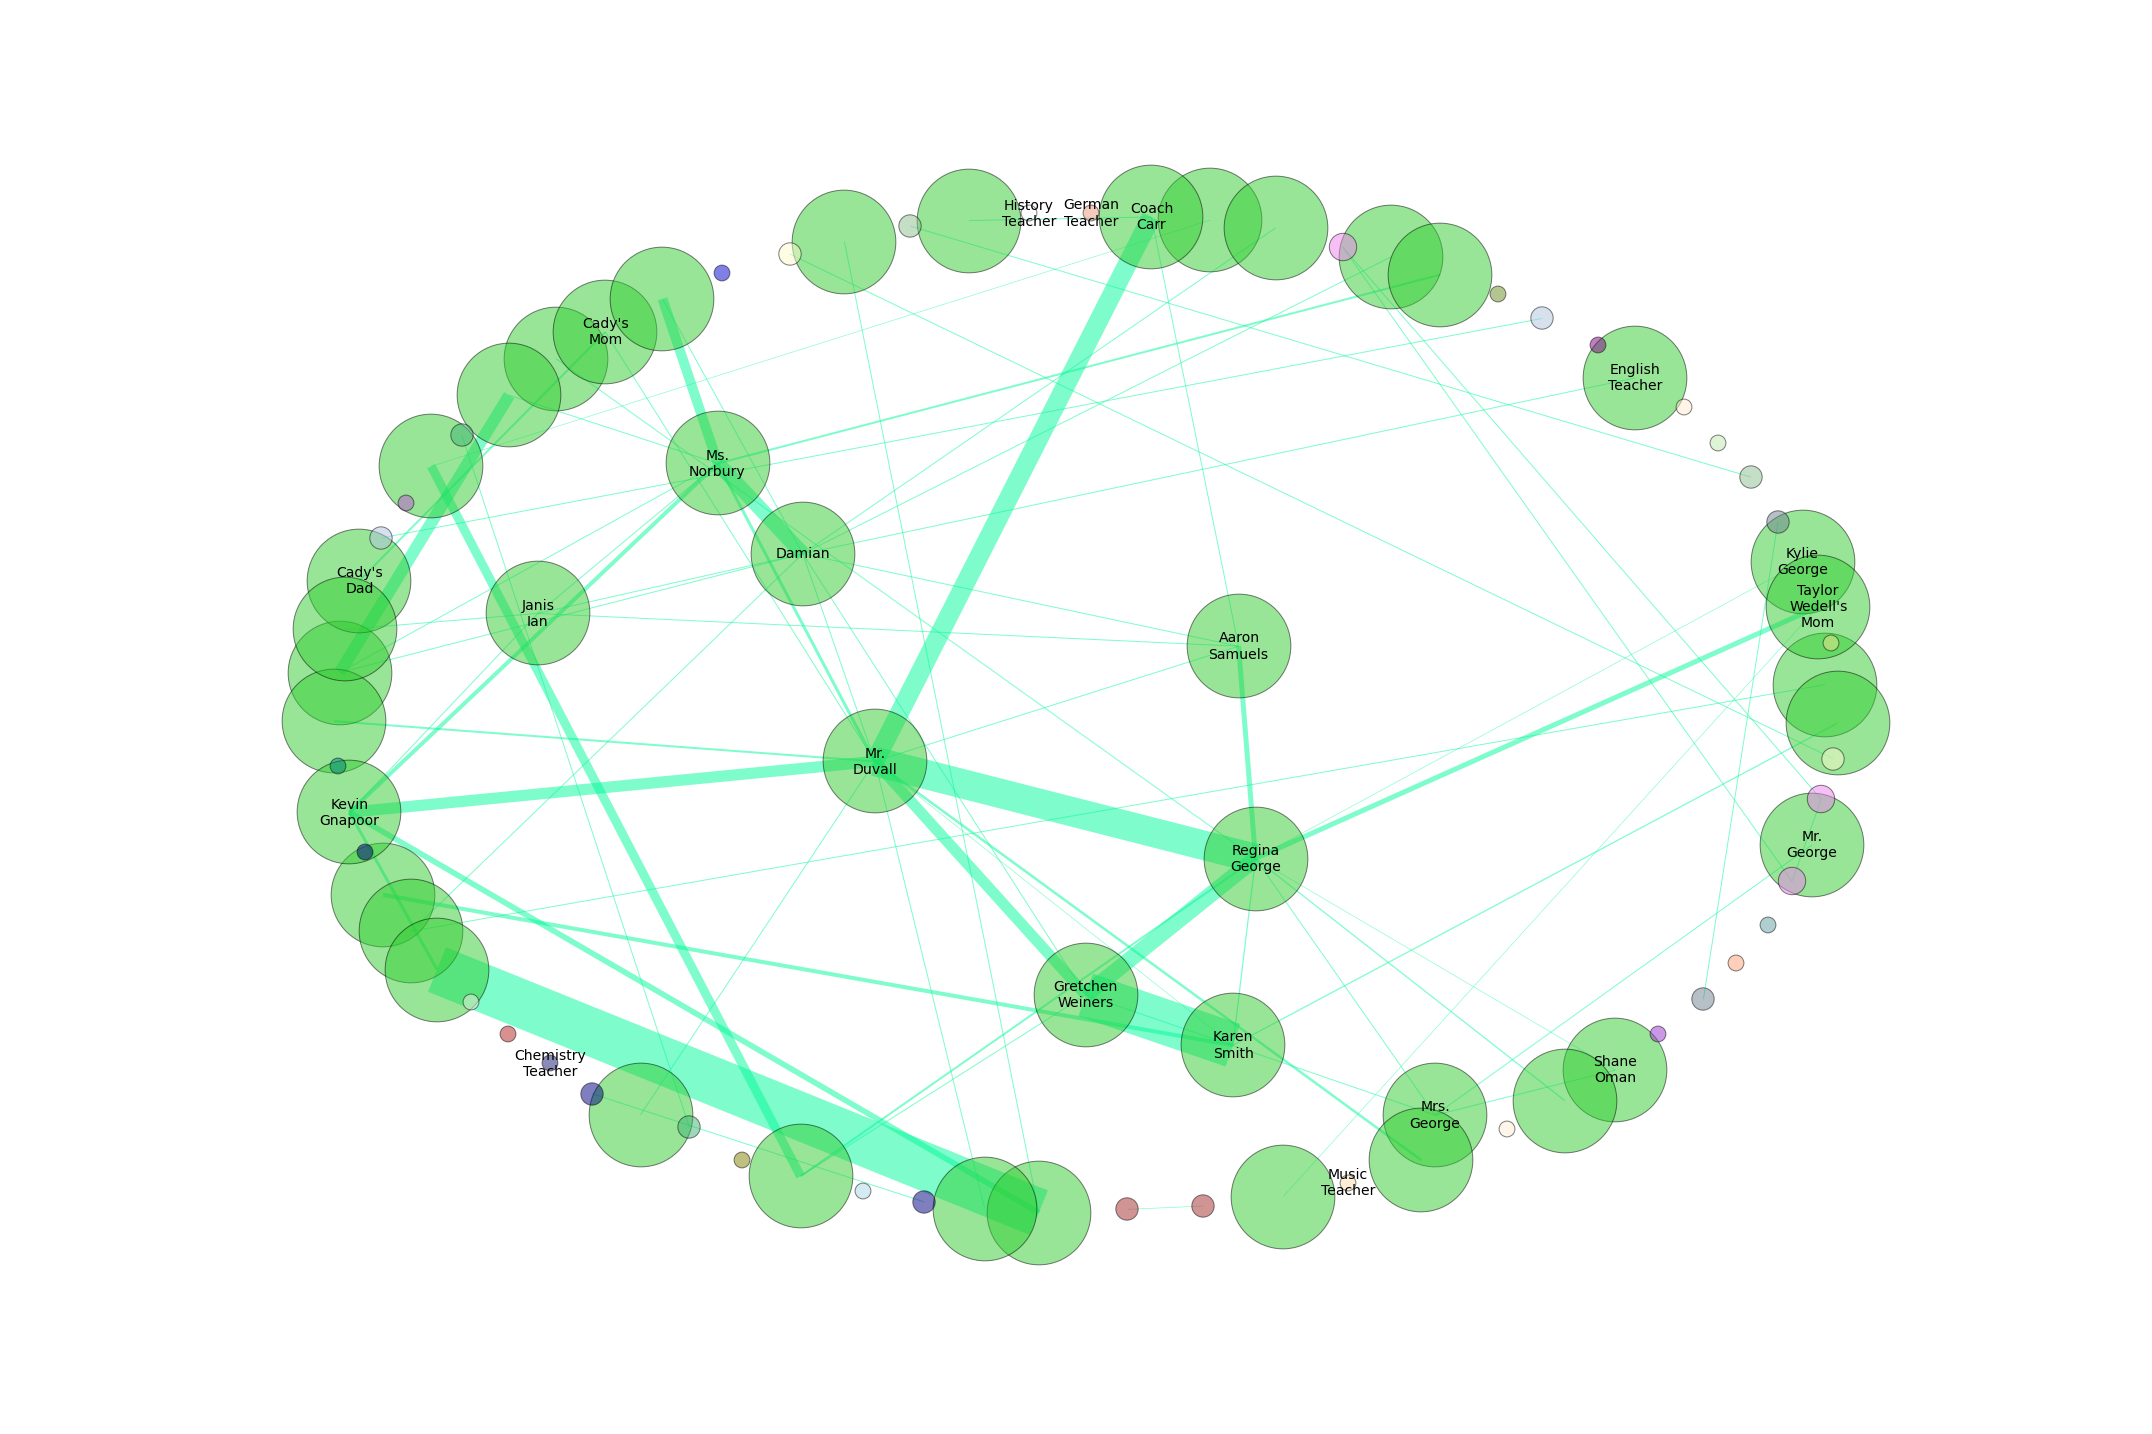

In [20]:
import random

pos = nx.spring_layout(no_cady, k=0.35)
for key, attribute in no_cady_dicts.items():
    if attribute['label'] is True:
        nx.draw_networkx_labels(no_cady, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14
                               )
for component in no_cady_components:
    nx.draw_networkx_nodes(no_cady, pos,
                           nodelist=component, alpha = 0.5, 
                           node_size = 250 * len(component), 
                           node_color = colors[random.randint(0, len(colors) - 1)], 
                           linewidth = 0
                          )
nx.draw_networkx_edges(no_cady, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

And in the actual world

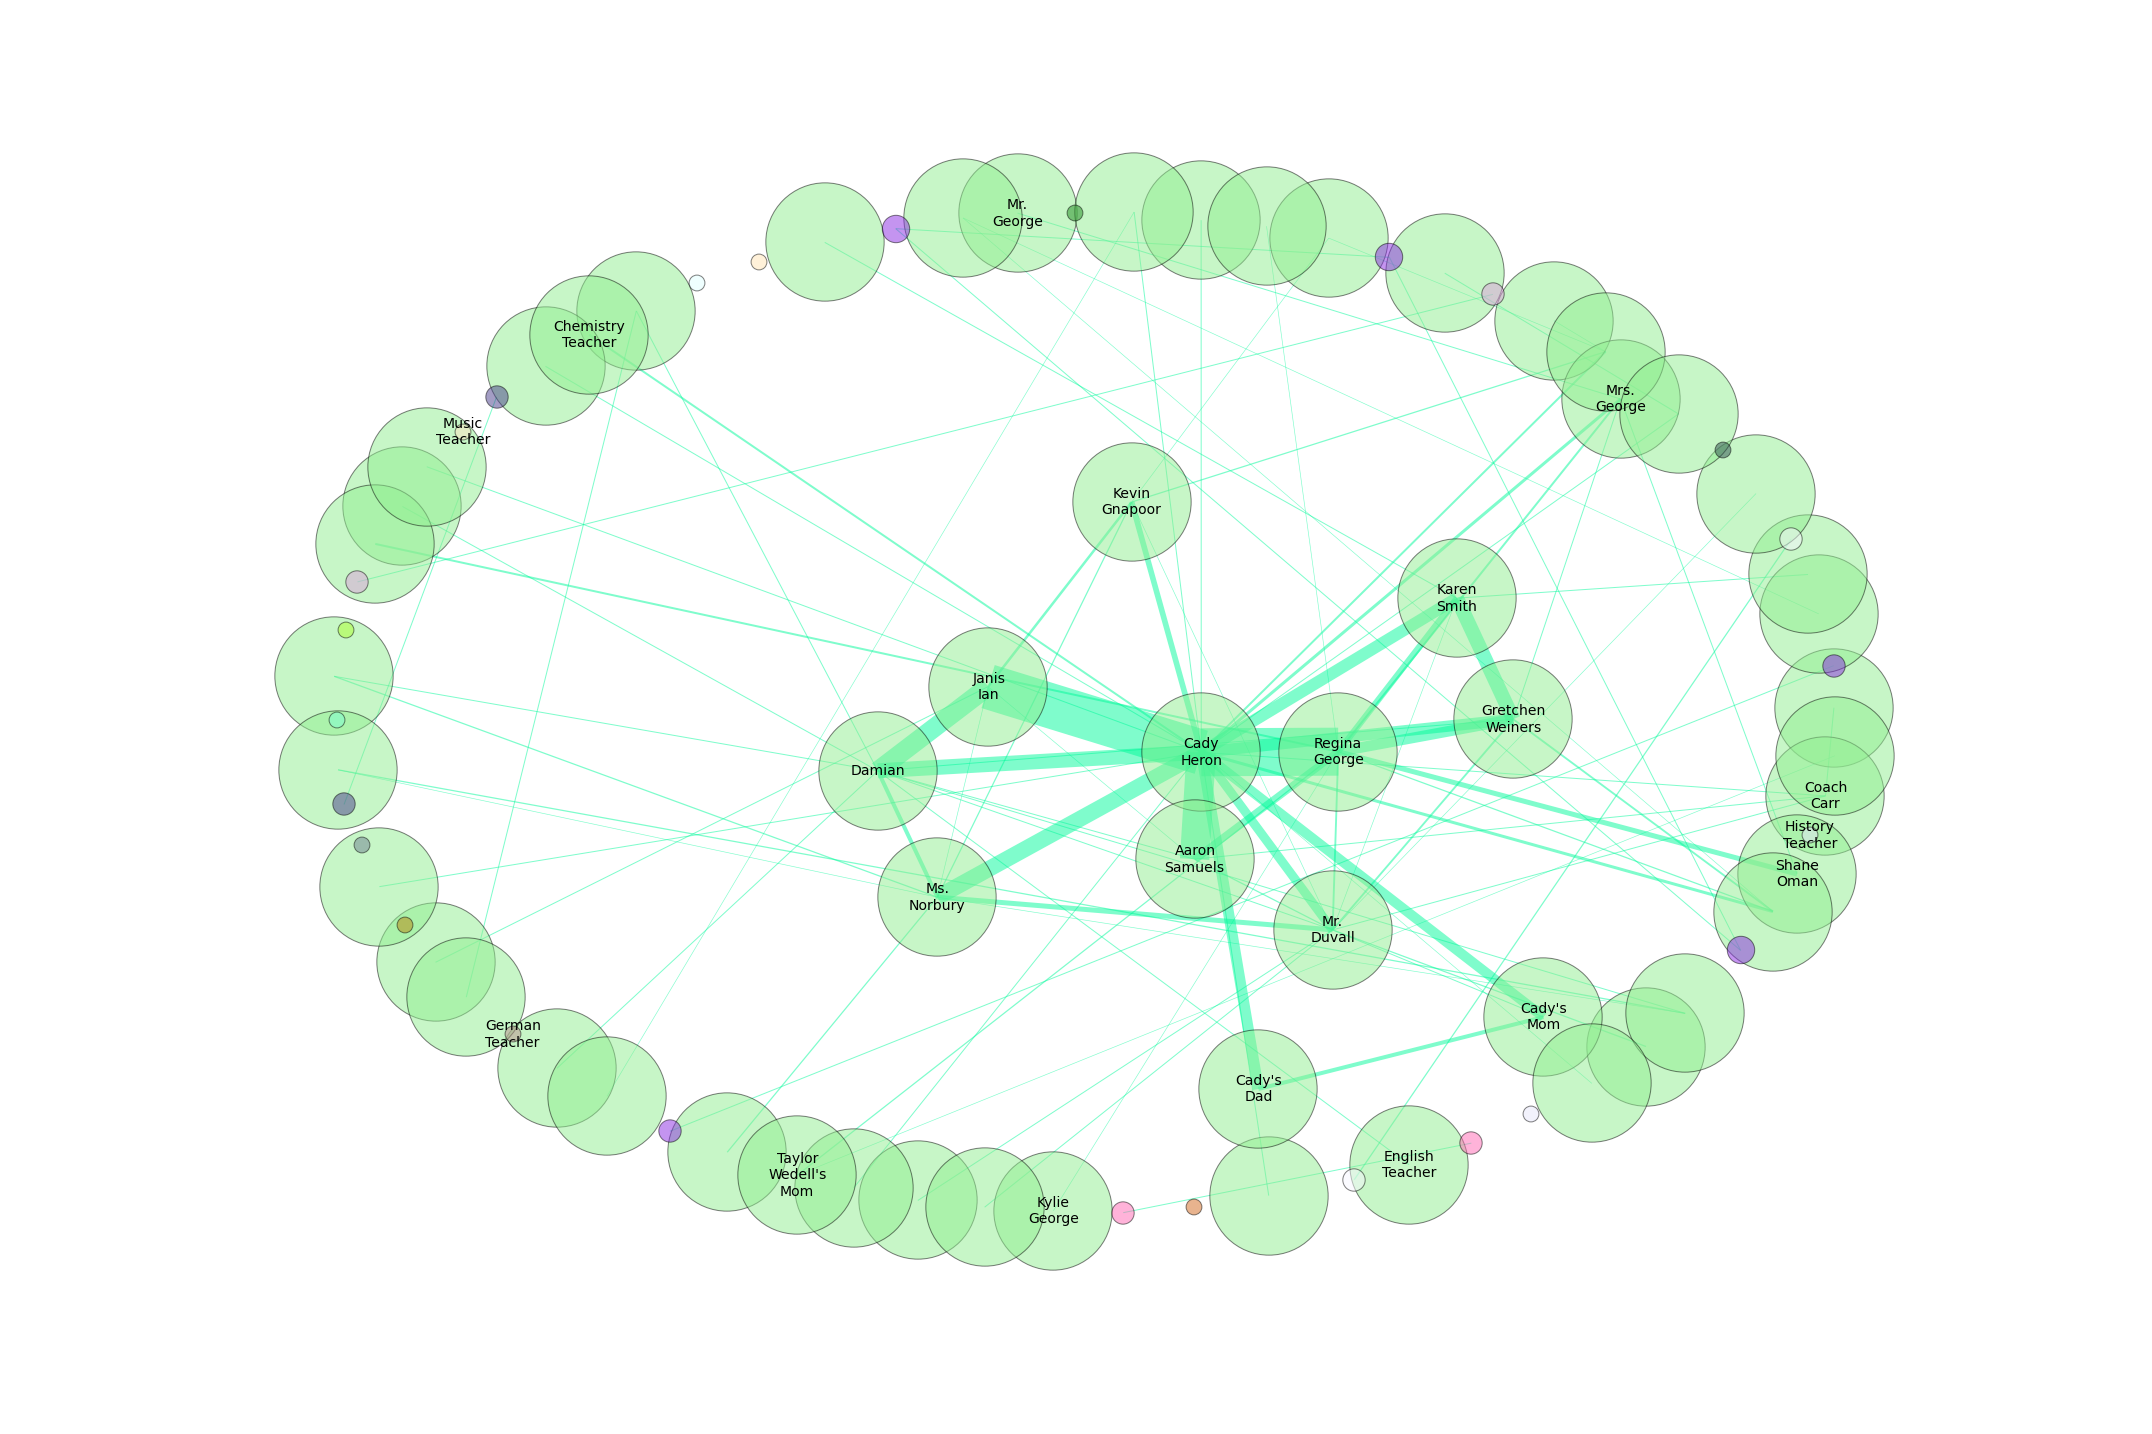

In [21]:
import random

mean_girls_components = list(nx.connected_components(mean_girls_weighted))

pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14
                               )
for component in mean_girls_components:
    nx.draw_networkx_nodes(mean_girls_weighted, pos,
                           nodelist=component, alpha = 0.5, 
                           node_size = 250 * len(component), 
                           node_color = colors[random.randint(0, len(colors) - 1)], 
                           linewidth = 0
                          )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [22]:
nx.number_connected_components(mean_girls_weighted)

20

In [23]:
nx.number_connected_components(no_cady)

30

This over-estimates how tightly connected these networks might be though. Let's weight the node size by the average shortest path to the given node

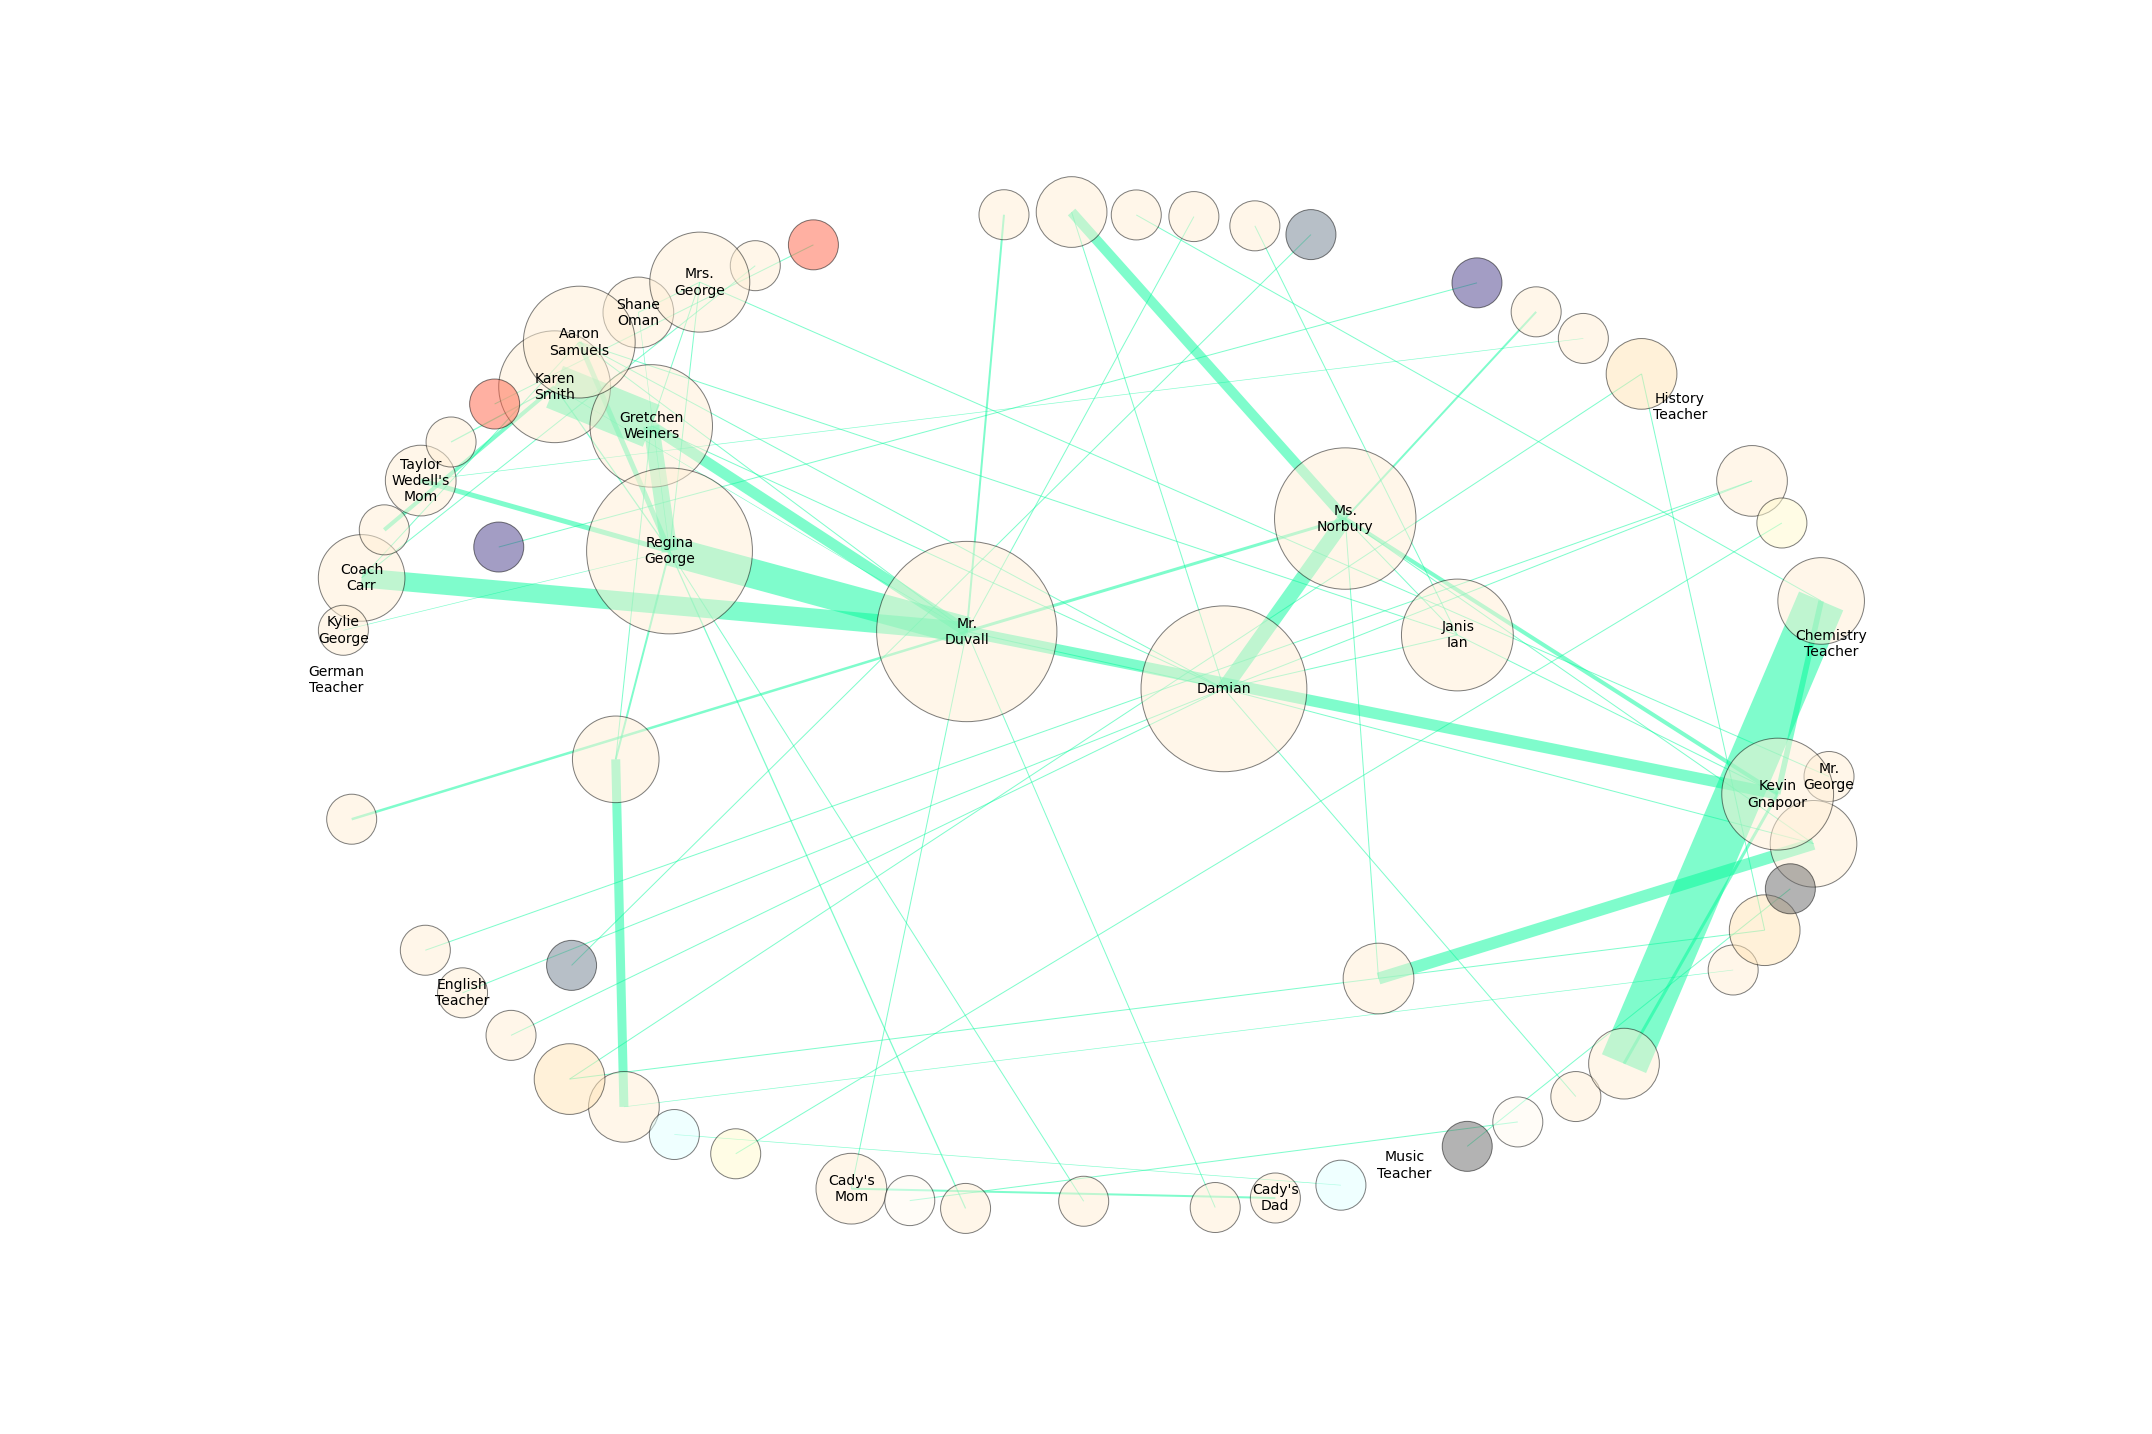

In [24]:
pos = nx.spring_layout(no_cady, k=0.35)
for key, attribute in no_cady_dicts.items():
    if attribute['label'] is True:
        nx.draw_networkx_labels(no_cady, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14
                               )
for component in no_cady_components:
    nx.draw_networkx_nodes(no_cady, pos,
                           nodelist=component, alpha = 0.5, 
                           node_size = [2500 * no_cady.degree(value) for value in component],
                           node_color = colors[random.randint(0, len(colors) - 1)], 
                           linewidth = 0
                          )
nx.draw_networkx_edges(no_cady, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

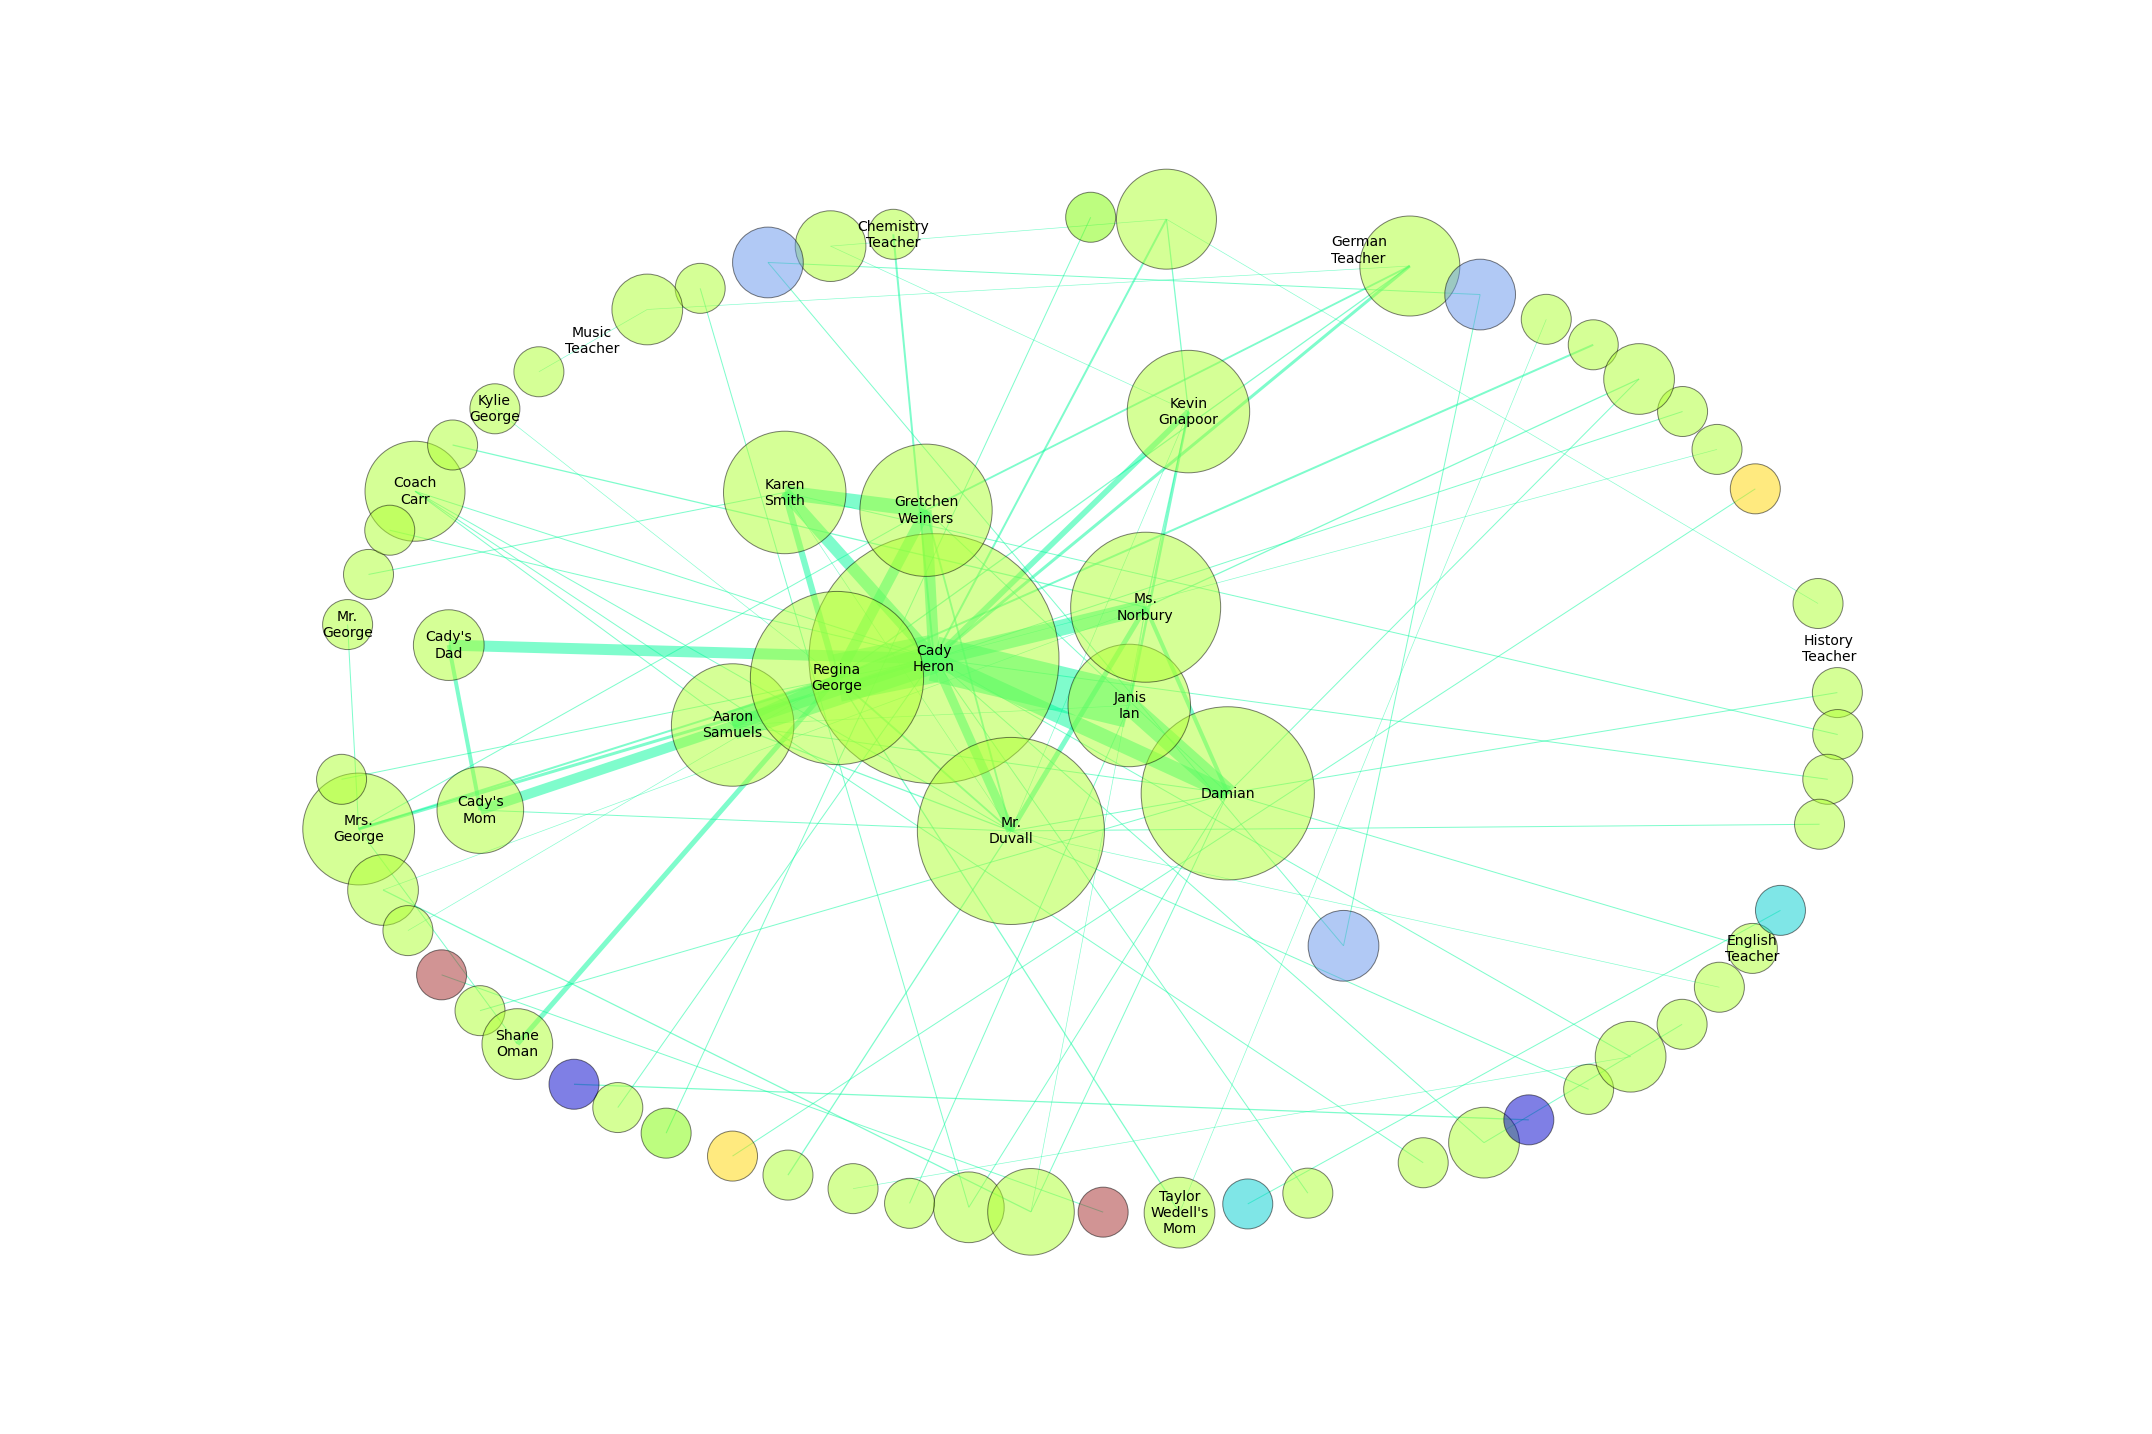

In [25]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14
                               )
    
for component in mean_girls_components:
    nx.draw_networkx_nodes(mean_girls_weighted, pos,
                           nodelist=component, alpha = 0.5, 
                           node_size = [2500 * mean_girls_weighted.degree(value) for value in component],
                           node_color = colors[random.randint(0, len(colors) - 1)], 
                           linewidth = 0
                          )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

#So, who gave Glen Coco *FOUR* candygrams?

In [26]:
YouTubeVideo("htyf5wnC96w")

Is Glen Coco connected to anybody?

In [27]:
for node in mean_girls_weighted.nodes_iter(data=True):
    if node[1]['name'] == 'Glen Coco':
        print node

('49', {'name': 'Glen Coco'})


We can modify our code just a little bit to identify where Glen Coco is 

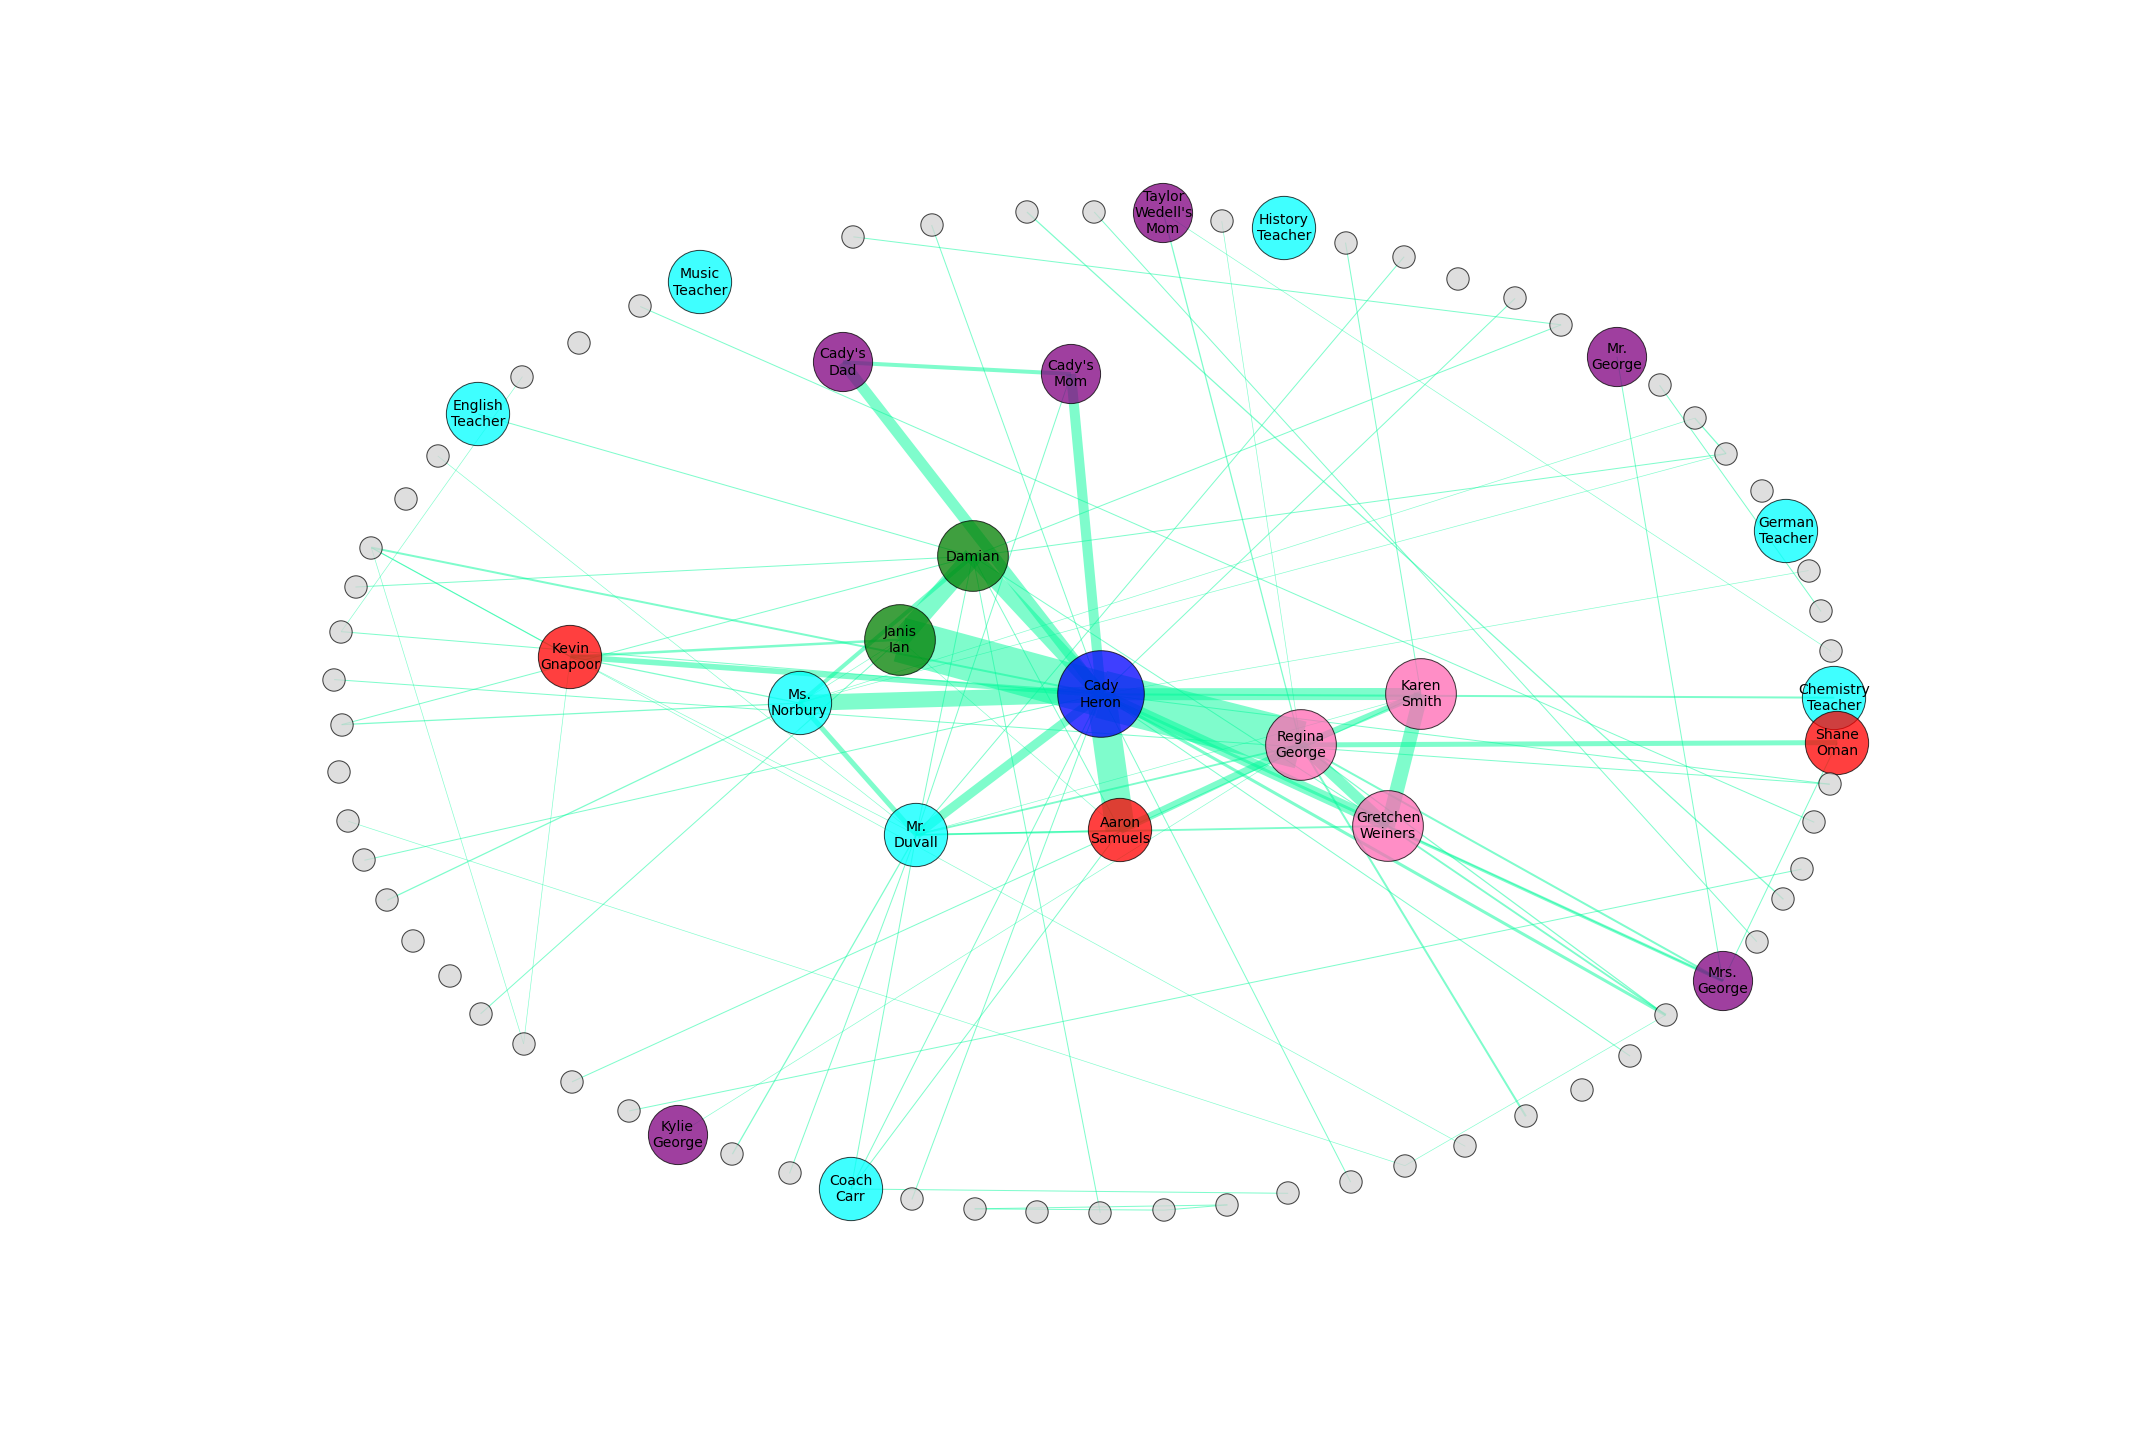

In [28]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

There he is!

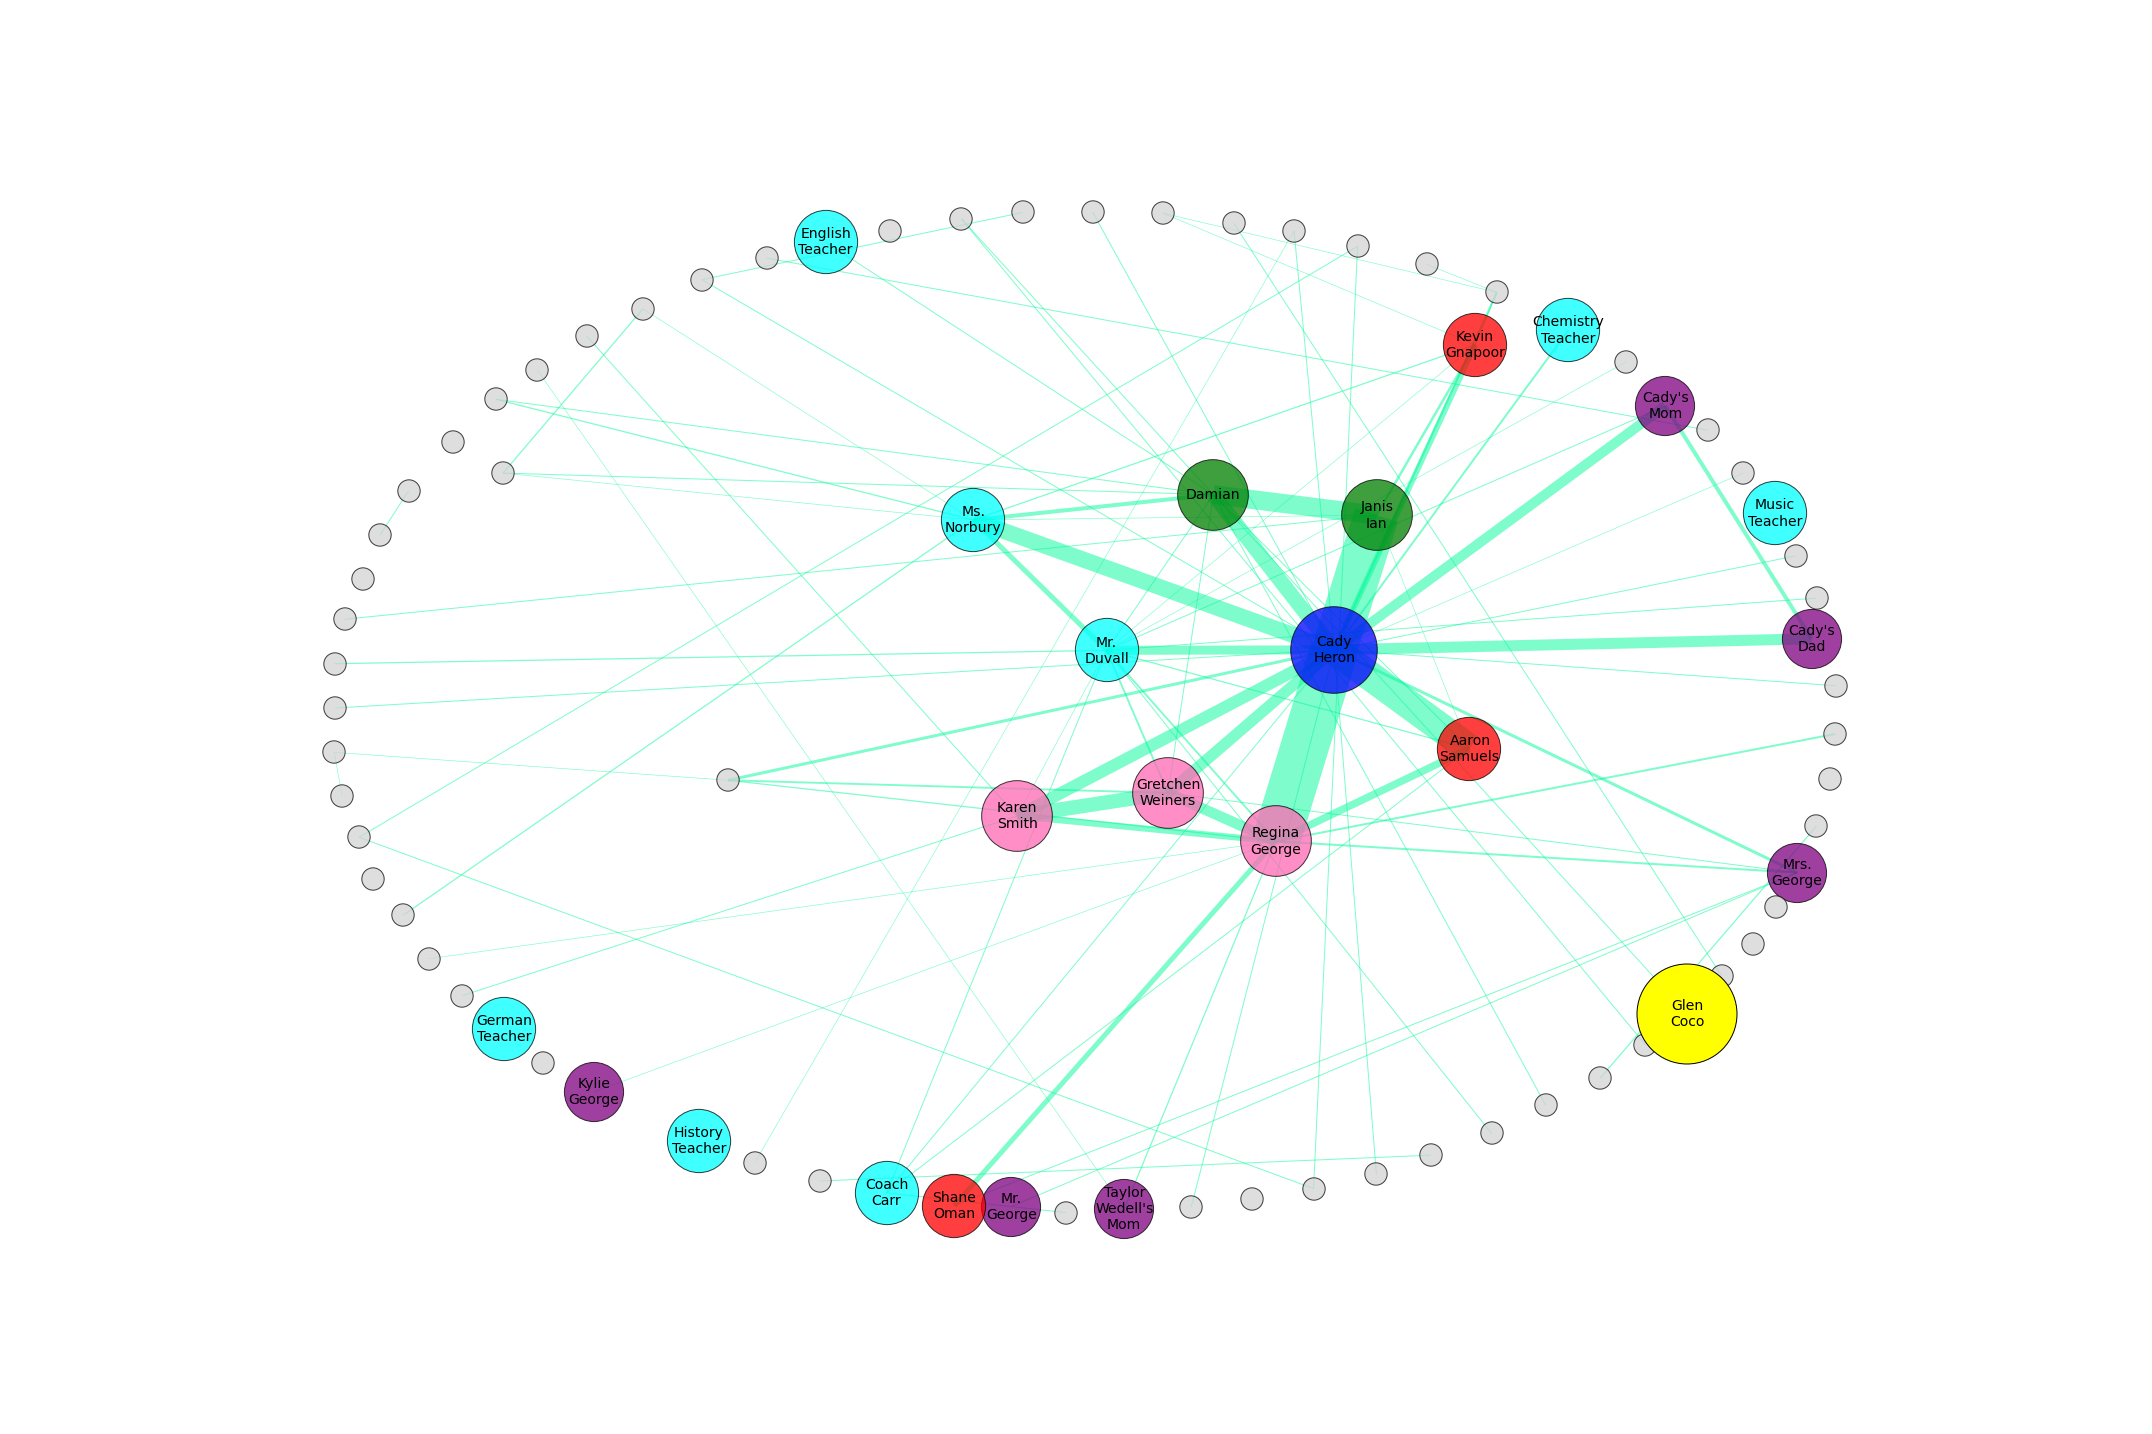

In [29]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
### Let's find Glen Coco!
nx.draw_networkx_nodes(mean_girls_weighted, pos, nodelist = ['49'],
                      node_size = 10000,
                      node_color = 'yellow')
nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {'49' : 'Glen\nCoco'},
                                font_size = 14,
                                alpha = 0.5
                               )
plt.axis('off')
plt.tight_layout()

NameError: name 'path_list' is not defined

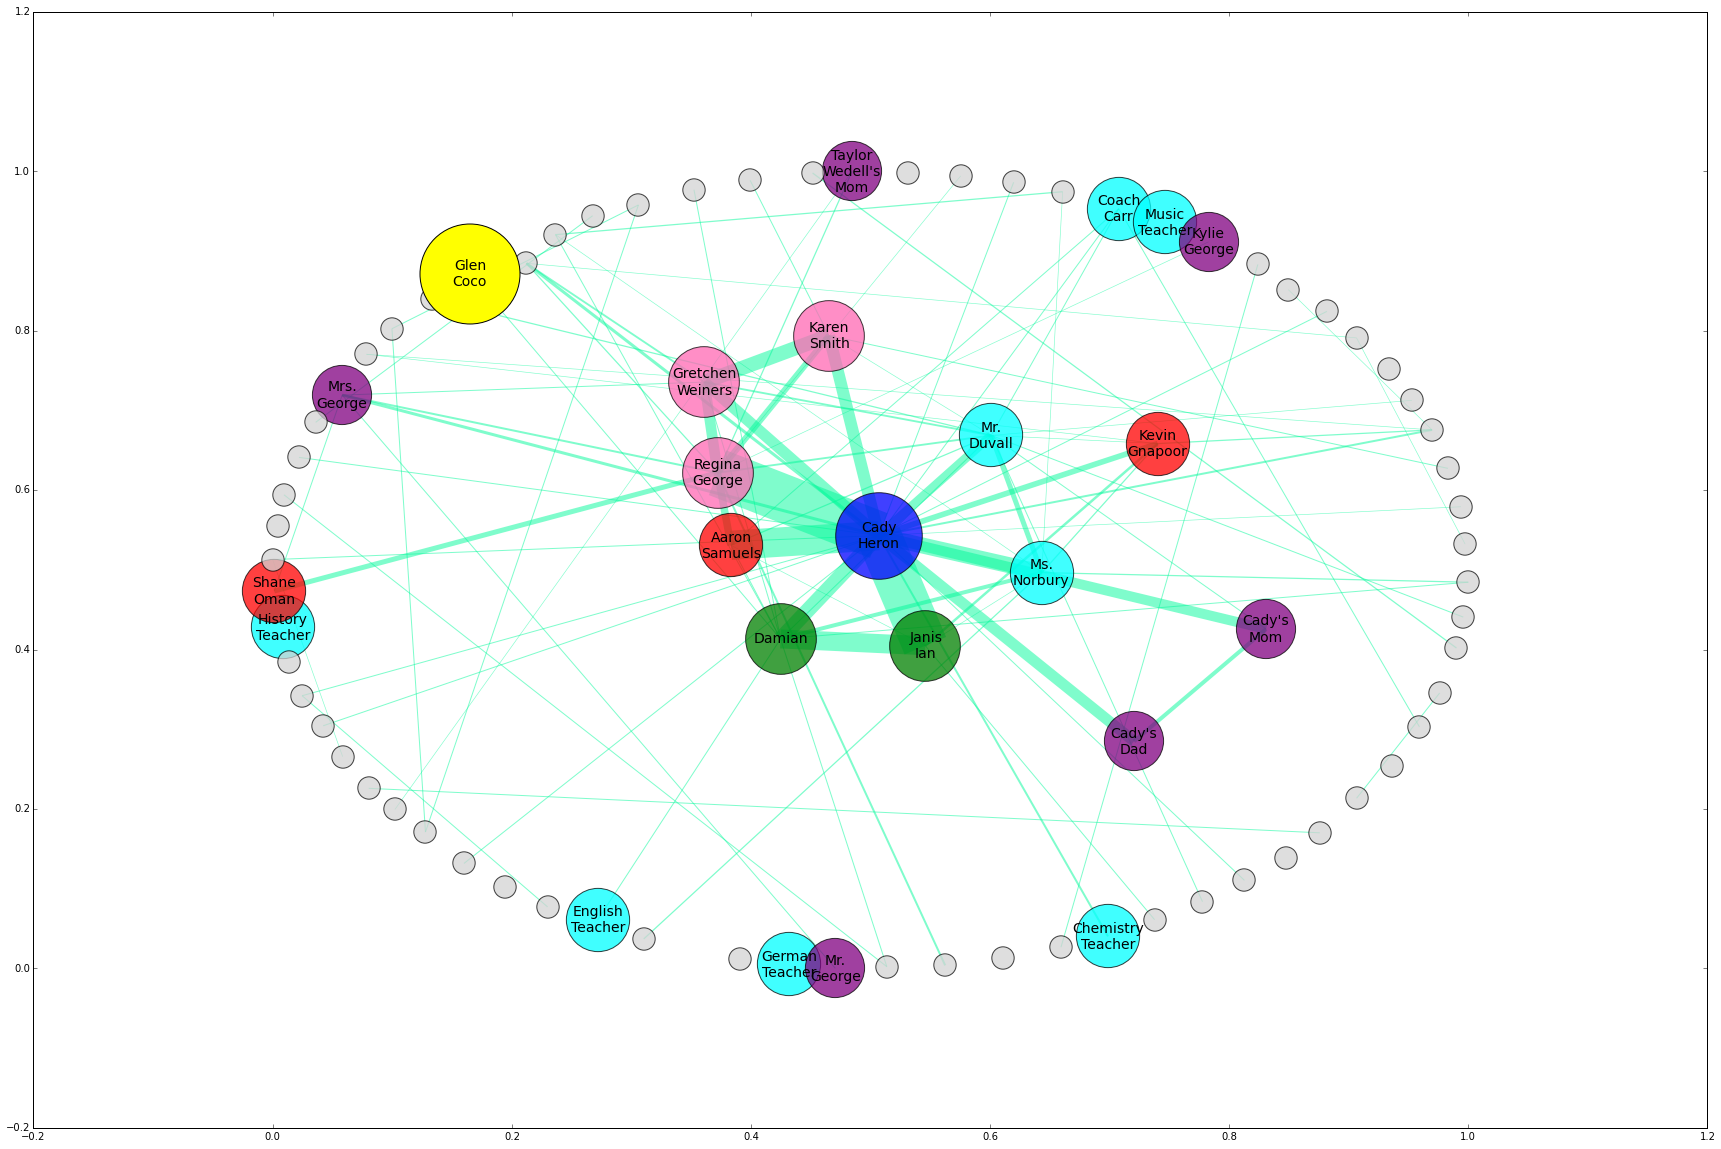

In [30]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
### Let's find Glen Coco!
nx.draw_networkx_nodes(mean_girls_weighted, pos, nodelist = ['49'],
                      node_size = 10000,
                      node_color = 'yellow')
nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {'49' : 'Glen\nCoco'},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, 
                       edgelist=path_list, 
                       width=10, 
                       edge_color='yellow', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [ ]:
mean_girls_weighted.degree('49')

In [ ]:
nx.single_source_shortest_path(mean_girls_weighted, '49')

So, he's not connected to a lot of people. Who is he two hops away from?

In [ ]:
path_list = [('49', '21')]
for key, value in nx.single_source_shortest_path(mean_girls_weighted, '49').items():
    if len(value) == 3:
        path_list.append(('21', value[2]))

path_list

Ok! Now we're getting somewhere! Who are these two-degree hops?

In [ ]:
connected_to_damian = [edge[1] for edge in path_list]

for node in mean_girls_weighted.nodes_iter(data=True):
    if node[0] in connected_to_damian:
        print node

So, we can probably make some assumptions here:

- Teachers aren't sending Glen Coco candygrams
- Neither is the girl who doesn't even go here
- Any main character probably isn't likely either (So, not Cady, Janis, or Gretchen)
- Let's *assume* that Glen Coco is heterosexual and women are sending him candygrams. This could easily not be the case, but let's assume so for the current exercise

In [ ]:
candidates = ['48', '28', '50']
candidate_edgelist = [('49', '21')]
for candidate in candidates:
    candidate_edgelist.append(('21', candidate))
    
candidate_edgelist

In [ ]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
### Let's find Glen Coco!
nx.draw_networkx_nodes(mean_girls_weighted, pos, nodelist = ['49'],
                      node_size = 10000,
                      node_color = 'yellow')
nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {'49' : 'Glen\nCoco'},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, 
                       edgelist=candidate_edgelist, 
                       width=10, 
                       edge_color='yellow', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [ ]:
no_glen_coco = nx.Graph(mean_girls_weighted)
no_glen_coco.remove_edge('49', '21')

pos = nx.spring_layout(no_glen_coco, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(no_glen_coco, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(no_glen_coco, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(no_glen_coco, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
### Let's find Glen Coco!
nx.draw_networkx_nodes(no_glen_coco, pos, nodelist = ['49'],
                      node_size = 10000,
                      node_color = 'yellow')
nx.draw_networkx_labels(no_glen_coco, pos, 
                                labels = {'49' : 'Glen\nCoco'},
                                font_size = 14,
                                alpha = 0.5
                               )
plt.axis('off')
plt.tight_layout()

In [ ]:
nx.single_source_shortest_path(no_glen_coco, '49')

##Quit Trying to Make Fetch Happen (It's Not Going to Happen!)

In [ ]:
YouTubeVideo('jjt9Qx9MBPk')

Why can't Fetch happen? Let's use a directed graph to find out!

In [ ]:
edge_counter = Counter(edge_list)

fetch_with_weight = []
for key, value in edge_counter.items():
    fetch_with_weight.append((key[0], key[1], value))
    
fetch = nx.DiGraph()
fetch.add_nodes_from(node_list)
fetch.add_weighted_edges_from(fetch_with_weight)

plastics_plus_cady = ['2', '31', '32', '33']

nodes_to_remove = []
for node in fetch.nodes_iter():
    if node not in plastics_plus_cady:
        nodes_to_remove.append(node)
        
edges_to_remove = []
for edge in fetch.edges_iter():
    if edge[0] not in plastics_plus_cady and edge[1] not in plastics_plus_cady:
        edges_to_remove.append(edge)       

fetch.remove_nodes_from(nodes_to_remove)
fetch.remove_edges_from(edges_to_remove)

edgewidth=[]
for (u, v, d) in fetch.edges(data=True):
    print u, v, d
    edgewidth.append(d['weight'])
    
for x in range(0, len(edgewidth)):
    edgewidth[x] = (edgewidth[x]/float(max(edgewidth) / 10))

In [ ]:
pos = nx.circular_layout(fetch)

nx.draw_networkx_nodes(fetch, pos,
                       node_size = 20000,
                       node_color = 'hotpink',
                       alpha = 0.75,
                       linewidth = 0)
nx.draw_networkx_labels(fetch, pos, 
                        labels = {node[0] : node[1]['name'].replace(' ', '\n') for node in fetch.nodes(data=True)},
                        font_size = 14,
                        alpha = 0.5
                       )
nx.draw_networkx_edges(fetch, pos, width=edgewidth, edge_color='gray', alpha = 0.85)
plt.axis('off')
plt.tight_layout()

In [ ]:
out_degree = fetch.out_degree([node for node in fetch.nodes()], 'weight')
for node in fetch.nodes(data=True):
    print node[1]['name'], ' --- ', out_degree[node[0]]

In [ ]:
in_degree = fetch.in_degree([node for node in fetch.nodes()], 'weight')
for node in fetch.nodes(data=True):
    print node[1]['name'], ' --- ', in_degree[node[0]]

In [ ]:
## Gretchen's out degrees

for edge in fetch.edges(data=True):
    if edge[0] == '32':
        print edge
        if edge[1] == '31':
            gretchen_to_regina = edge[2]['weight']
        
print '\n'
## Regina's out degrees

for edge in fetch.edges(data=True):
    if edge[0] == '31':
        print edge
        if edge[1] == '32':
            regina_to_gretchen = edge[2]['weight']

In [ ]:
gretchen_to_regina - regina_to_gretchen

So yes, you've probably been personally victimized by Regina George.